# Penerapan Algoritma Supervised Learning dan Unsupervised Learning untuk Prediksi Penyakit Jantung dan Clustering Fitur-Fitur Prediktornya

##### *Author: Adinda Putri*

**Tujuan Proyek:**
Proyek ini bertujuan untuk membuat, mengevaluasi, dan membandingkan kinerja dari enam algoritma supervised learning fundamental dalam classification task untuk memprediksi keberadaan penyakit jantung pada pasien. Selain itu, proyek ini juga bertujuan untuk mengimplementasikan algoritma unsupervised learning dan mengevaluasi performanya terhadap algoritma yang sama dari library Scikit-Learn

**Dataset:**
Dataset yang digunakan adalah "Heart Disease UCI" yang diperoleh dari Kaggle. Dataset ini berisi 16 atribut medis dari pasien.

**Metodologi:**
1.  **Exploratory Data Analysis (EDA):** Memahami pola, distribusi, dan hubungan dalam data.
2.  **Data Preprocessing:** Menyiapkan data untuk proses pemodelan.
3.  **Modeling and Validation:** Membangun setiap algoritma dari nol (*from scratch*).
4.  **Evaluasi & Perbandingan:** Menganalisis kinerja setiap model menggunakan metrik yang relevan dengan strategi hold-out validation dan k-fold cross-validation 

# Exploratory Data Analysis (EDA)
## Heart Disease UCI Dataset

**Tujuan:** Memahami karakteristik dataset dan pola data untuk prediksi penyakit jantung

**Dataset:** Heart Disease UCI dari Kaggle
- 920 samples, 16 features (termasuk target)
- Target: 'num', yaitu stages dari penyakit jantung

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', message='.*Found unknown categories.*')
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', 
                          message='.*This Pipeline instance is not fitted yet.*',
                          category=FutureWarning)

# Styling
plt.style.use('default')
sns.set_palette("husl")

## Data Reading  

In [2]:
df = pd.read_csv('../dataset/heart_disease_uci.csv')

## Data Description 

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.shape

(920, 16)

In [6]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

## Checking Missing Values 

In [7]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
# Missing values analysis
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("Missing values per kolom:")
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("Tidak ada missing values dalam dataset")
else: 
    print("Terdapat missing values")
    for col, missing_count in missing_values[missing_values > 0].items():
        percentage = (missing_count / len(df)) * 100
        print(f"  {col}: {missing_count} ({percentage:.1f}%)")

print(f"\nIMPLICIT MISSING VALUES (zeros di fitur medis):")
medical_features = ['trestbps', 'chol', 'thalch']

for col in medical_features:
    if col in df.columns:
        zero_count = (df[col] == 0).sum()
        if zero_count > 0:
            print(f"  {col}: {zero_count} zeros ({zero_count/len(df)*100:.1f}%) - likely missing")
        else:
            print(f"  {col}: No zeros")

Missing values per kolom:
          Missing Count  Missing Percentage
trestbps             59            6.413043
chol                 30            3.260870
fbs                  90            9.782609
restecg               2            0.217391
thalch               55            5.978261
exang                55            5.978261
oldpeak              62            6.739130
slope               309           33.586957
ca                  611           66.413043
thal                486           52.826087
Terdapat missing values
  trestbps: 59 (6.4%)
  chol: 30 (3.3%)
  fbs: 90 (9.8%)
  restecg: 2 (0.2%)
  thalch: 55 (6.0%)
  exang: 55 (6.0%)
  oldpeak: 62 (6.7%)
  slope: 309 (33.6%)
  ca: 611 (66.4%)
  thal: 486 (52.8%)

IMPLICIT MISSING VALUES (zeros di fitur medis):
  trestbps: 1 zeros (0.1%) - likely missing
  chol: 172 zeros (18.7%) - likely missing
  thalch: No zeros


## Checking Duplicate Values 

In [9]:
# Duplicates check
nb_duplicates = df.duplicated().sum()
print(f"Duplicates: {nb_duplicates}")

Duplicates: 0


## Feature Engineering 

Dilakukan fitur engineering untuk target dengan cara mengubah nama kolom 'num' menjadi 'has disease' dan mengonversi nilainya menjadi binary

In [10]:
# Feature Engineering
print("Feature Engineering")

# Target variable adalah 'num'
target_col = 'num'
print(f"Target variable: {target_col}")
print(f"Unique values dalam target: {sorted(df[target_col].unique())}")
print(f"Distribusi target asli (num):")
print("  0 = Tidak Memiliki Penyakit Jantung")
print("  1,2,3,4 = Stages dari Penyakit Jantung")
print(df[target_col].value_counts().sort_index())

# Convert multi-class target ke binary classification (standard practice)
# 0 = Tidak Memiliki Penyakit Jantung, 1,2,3,4 = Memiliki Penyakit Jantung
df[target_col] =(df[target_col] > 0).astype(int)

print(f"\nTarget setelah konversi ke binary:")
print(f"0 = Tidak Memiliki Penyakit Jantung, 1 = Memiliki Penyakit Jantung")
print(f"Distribusi target binary:")
df.rename(columns={'num' : 'has_disease'}, inplace=True)
target_col = 'has_disease'
print(df[target_col].value_counts().sort_index())

Feature Engineering
Target variable: num
Unique values dalam target: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Distribusi target asli (num):
  0 = Tidak Memiliki Penyakit Jantung
  1,2,3,4 = Stages dari Penyakit Jantung
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Target setelah konversi ke binary:
0 = Tidak Memiliki Penyakit Jantung, 1 = Memiliki Penyakit Jantung
Distribusi target binary:
has_disease
0    411
1    509
Name: count, dtype: int64


## Dimension Reduction

- Fitur id dihapus karena hanya merupakan identifier. Akan tetapi, fitur id berguna untuk cek duplikasi sehingga drop kolom id dilakukan setelah cek duplikasi.
- Fitur dataset dihapus karena menunjukkan lokasi pengambilan data. Memasukkan fitur ini beresiko membuat model bias terhadap lokasi tertentu, misalnya bias "pasien dari Bandung cenderung sakit". 


In [11]:
df.drop(['id', 'dataset'], axis=1, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,has_disease
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## Feature Classification

Pada tahap feature type classification, kolom id dan has_disease tidak diikutsertakan karena:
- id: identifier, fitur tidak relevan untuk prediksi penyakit jantung
- has_disease: target, variabel dependen ,nilai yang ingin diprediksi 

In [12]:
# Feature Type Classification
print("Feature Classification:")

# Berdasarkan domain knowledge Heart Disease UCI dataset, excluding id dan has_disease
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

print(f"Fitur Numerik ({len(numerical_features)}): {numerical_features}")
print(f"Fitur Kategorikal ({len(categorical_features)}): {categorical_features}")

Feature Classification:
Fitur Numerik (5): ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
Fitur Kategorikal (8): ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']


## Univariate Analysis 

### Data Distribution and Data Visualization for Each Feature 

Informasi unique values untuk tipe kategorikal diperlukan untuk mendeteksi inkonsistensi data, misalnya inkonsistensi dalam format string untuk 'Male' dan 'male' pada fitur 'sex'.  

In [13]:
# Unique values untuk kategorikal
print(f"\nUnique values fitur kategorikal:")
for col in categorical_features:
    if col in df.columns:
        unique_vals = (df[col].unique())
        print(f"{col}: {unique_vals} ({len(unique_vals)} unique values)")


Unique values fitur kategorikal:
sex: ['Male' 'Female'] (2 unique values)
cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina'] (4 unique values)
fbs: [True False nan] (3 unique values)
restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan] (4 unique values)
exang: [False True nan] (3 unique values)
slope: ['downsloping' 'flat' 'upsloping' nan] (4 unique values)
thal: ['fixed defect' 'normal' 'reversable defect' nan] (4 unique values)
ca: [ 0.  3.  2.  1. nan] (5 unique values)


Selanjutnya, dilakukan visualisasi distribusi data kategorikal (excluding nan) untuk melihat persebaran data masing-masing fitur. Tahap ini juga berguna untuk penentuan metode imputation untuk meng-handle missing values 


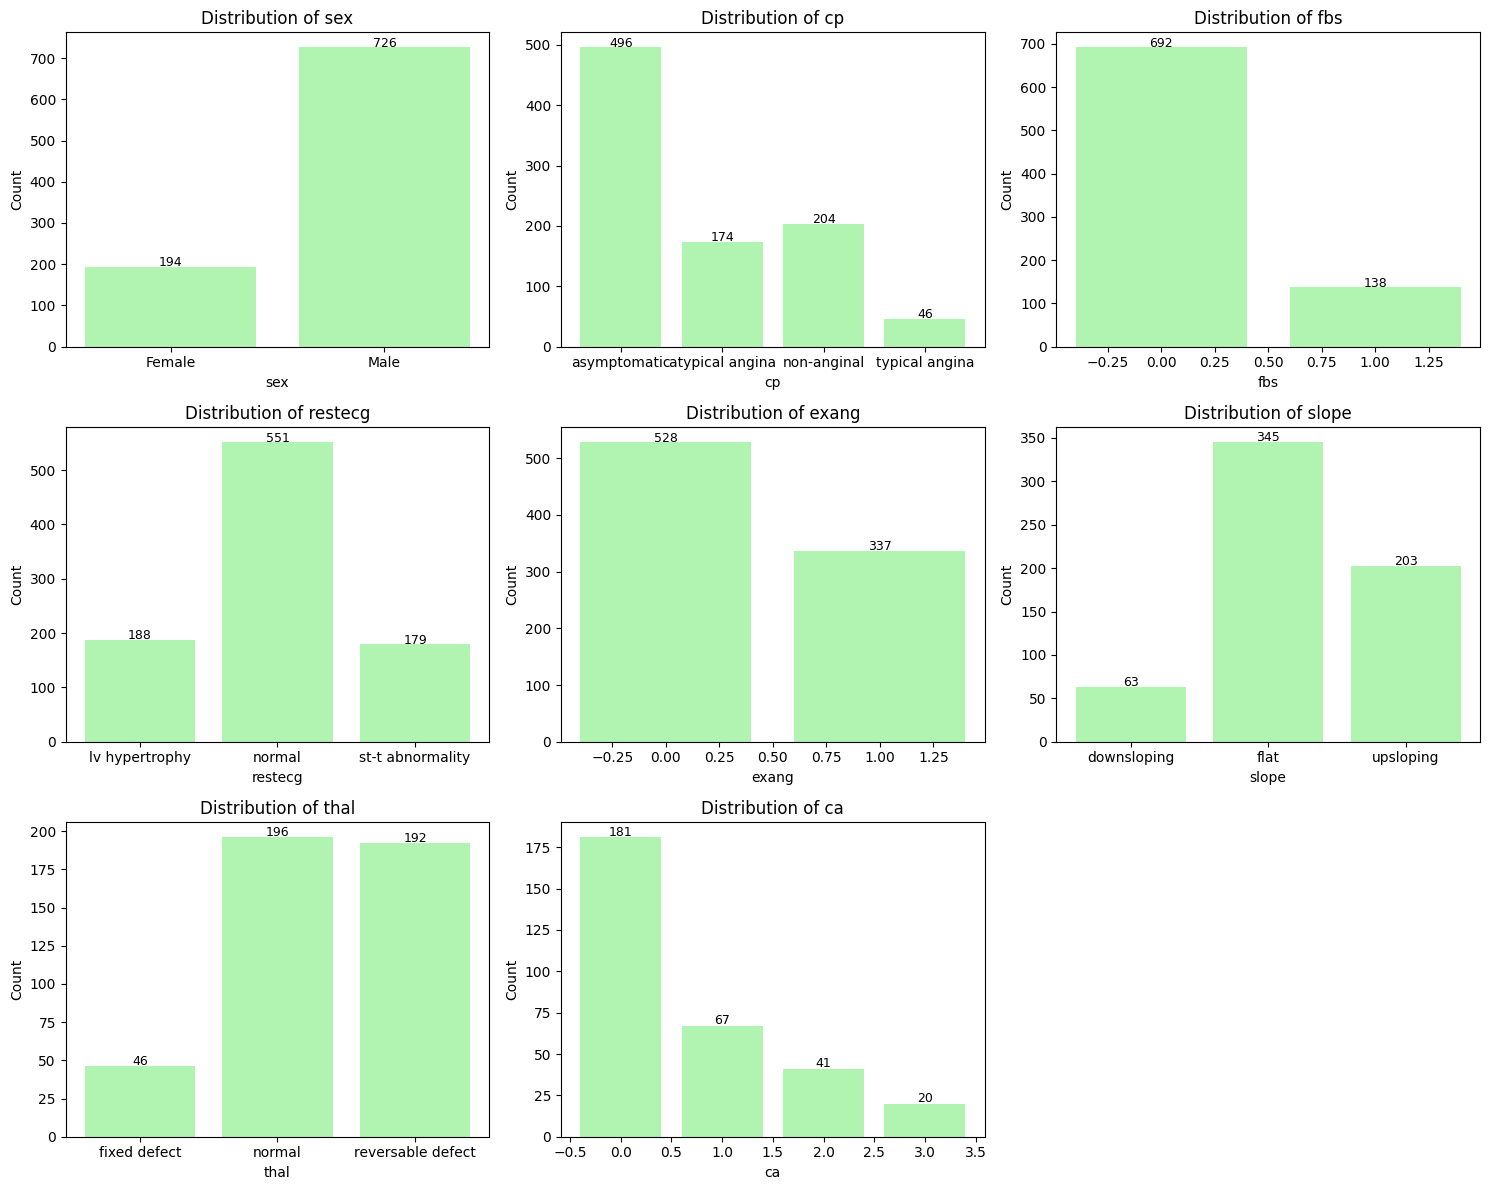

In [14]:
# Distribusi fitur kategorikal
cat_features_to_plot = [col for col in categorical_features]
n_cols = 3
n_rows = (len(cat_features_to_plot) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(cat_features_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    value_counts = df[col].value_counts().sort_index()
    bars = plt.bar(value_counts.index, value_counts.values, alpha=0.7, color='lightgreen')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Add value labels on bars
    for j, v in enumerate(value_counts.values):
        plt.text(value_counts.index[j], v + 1, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

Dilakukan juga visualisasi distribusi fitur numerik untuk menganalisis karakteristik data 

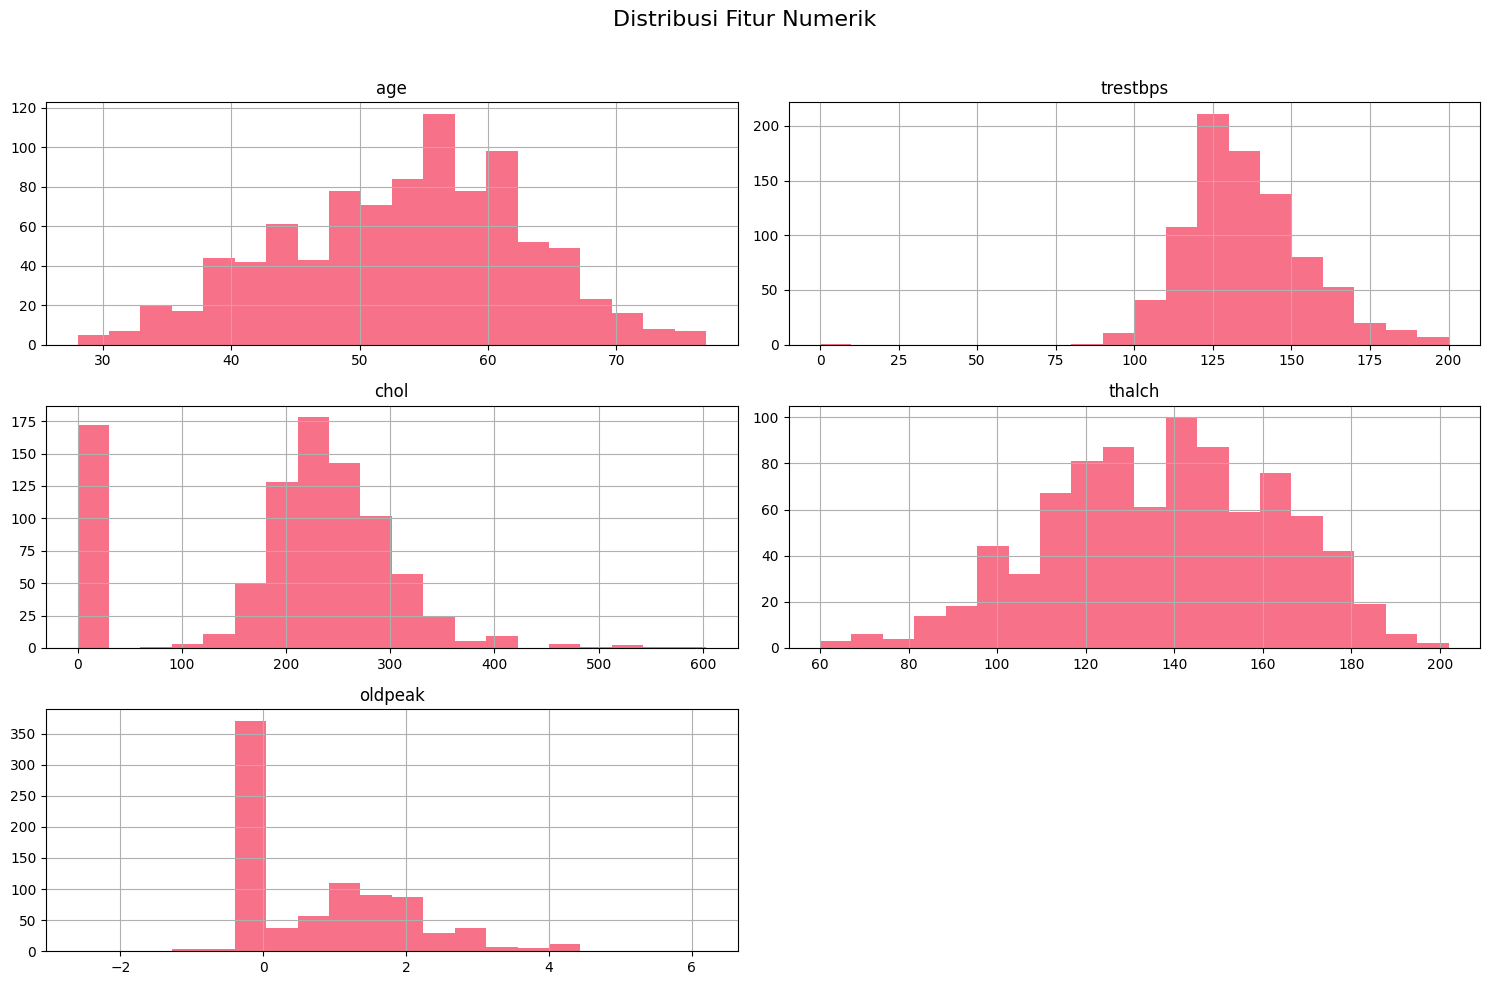

In [15]:
# Data Distribution Fitur Numerik
df[numerical_features].hist(bins=20, figsize=(15, 10))

plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

### Descriptive Statistics

Descriptive Statistics dilakukan untuk mendeskripsikan lebih lanjut data visualisasi fitur numerik. Selain itu, ini juga berfungsi untuk mendeteksi inkonsistensi data numerik 

In [16]:
# Basic descriptive statistics
df[numerical_features].describe()

,age,trestbps,chol,thalch,oldpeak
count,920.000000,861.000000,890.000000,865.000000,858.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788
std,9.424685,19.066070,110.780810,25.926276,1.091226
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,175.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000
75%,60.000000,140.000000,268.000000,157.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [17]:
# Detailed statistics fitur numerik
print("\nStatistik Detail untuk Fitur Numerik:")

for col in numerical_features:
    print(f"{col.upper()}:")
    print(f"  - Jumlah data: {df[col].count()}")
    print(f"  - Mean: {df[col].mean():.2f}")
    print(f"  - Std: {df[col].std():.2f}")
    print(f"  - Min: {df[col].min()}")
    print(f"  - Max: {df[col].max()}")
    print(f"  - Q1 (25%): {df[col].quantile(0.25):.2f}")
    print(f"  - Median (50%): {df[col].median():.2f}")
    print(f"  - Q3 (75%): {df[col].quantile(0.75):.2f}")
    print(f"  - IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")
    print(f"  - Skewness: {df[col].skew():.2f}")
    print(f"  - Kurtosis: {df[col].kurtosis():.2f}\n")


Statistik Detail untuk Fitur Numerik:
AGE:
  - Jumlah data: 920
  - Mean: 53.51
  - Std: 9.42
  - Min: 28
  - Max: 77
  - Q1 (25%): 47.00
  - Median (50%): 54.00
  - Q3 (75%): 60.00
  - IQR: 13.00
  - Skewness: -0.20
  - Kurtosis: -0.38

TRESTBPS:
  - Jumlah data: 861
  - Mean: 132.13
  - Std: 19.07
  - Min: 0.0
  - Max: 200.0
  - Q1 (25%): 120.00
  - Median (50%): 130.00
  - Q3 (75%): 140.00
  - IQR: 20.00
  - Skewness: 0.21
  - Kurtosis: 2.96

CHOL:
  - Jumlah data: 890
  - Mean: 199.13
  - Std: 110.78
  - Min: 0.0
  - Max: 603.0
  - Q1 (25%): 175.00
  - Median (50%): 223.00
  - Q3 (75%): 268.00
  - IQR: 93.00
  - Skewness: -0.61
  - Kurtosis: 0.06

THALCH:
  - Jumlah data: 865
  - Mean: 137.55
  - Std: 25.93
  - Min: 60.0
  - Max: 202.0
  - Q1 (25%): 120.00
  - Median (50%): 140.00
  - Q3 (75%): 157.00
  - IQR: 37.00
  - Skewness: -0.21
  - Kurtosis: -0.48

OLDPEAK:
  - Jumlah data: 858
  - Mean: 0.88
  - Std: 1.09
  - Min: -2.6
  - Max: 6.2
  - Q1 (25%): 0.00
  - Median (50%): 0.5

## Bivariate Analysis

Bivariate Analyisis yang dilakukan adalah:
- Hubungan Fitur Numerik dengan Target
- Hubungan Fitur Kategorikal dengan Target
- Hubungan antarfitur 

### Hubungan Fitur Numerik dengan Target 

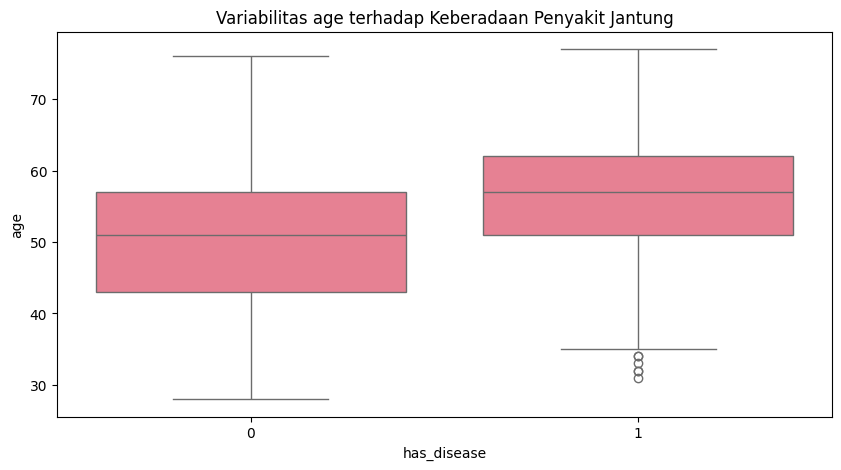

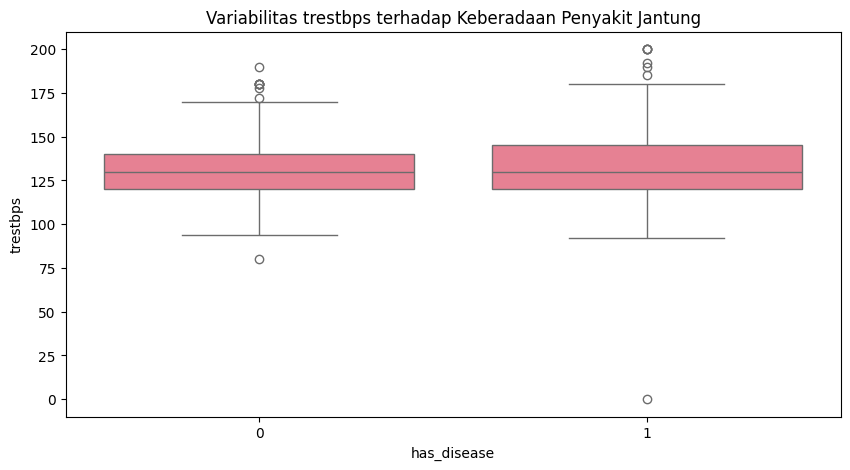

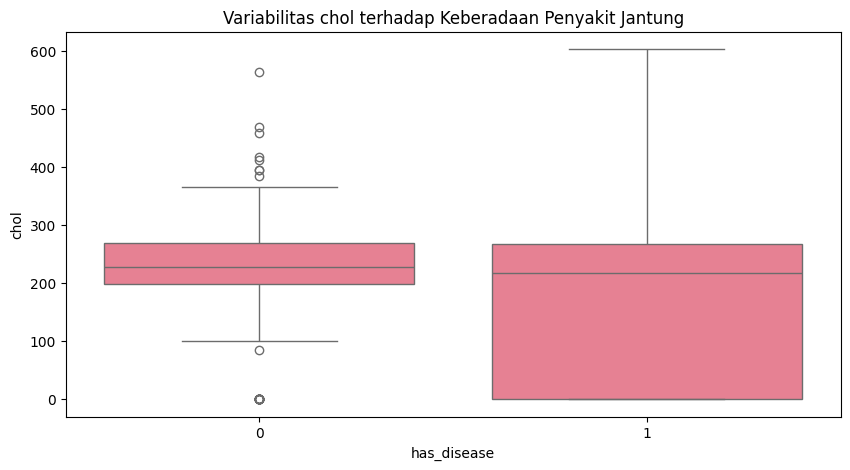

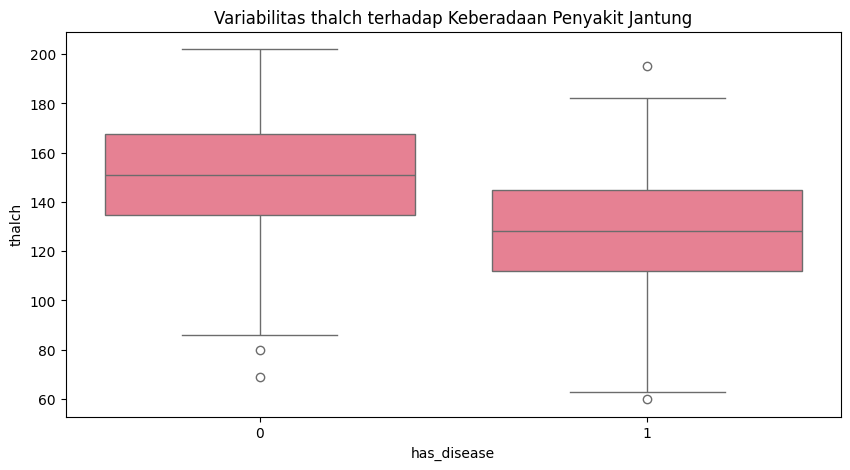

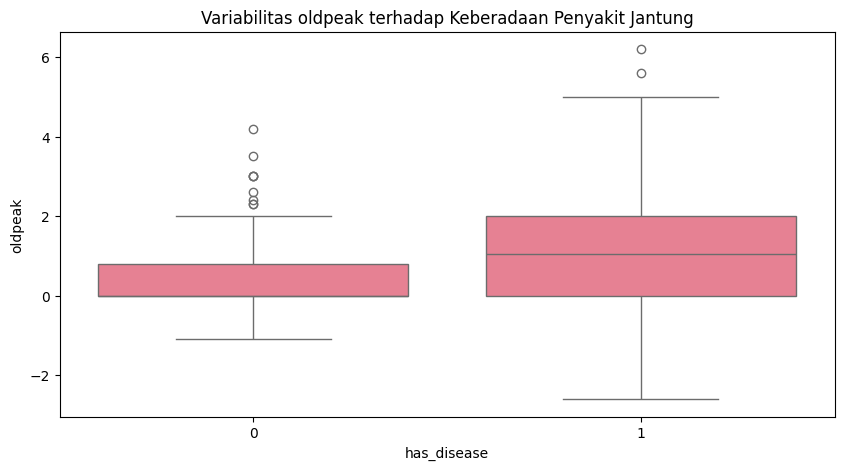

In [18]:
for numerical_feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=target_col, y=numerical_feature, data=df)
    plt.title(f'Variabilitas {numerical_feature} terhadap Keberadaan Penyakit Jantung')
    plt.show()

### Hubungan Fitur Kategorikal dengan Target 

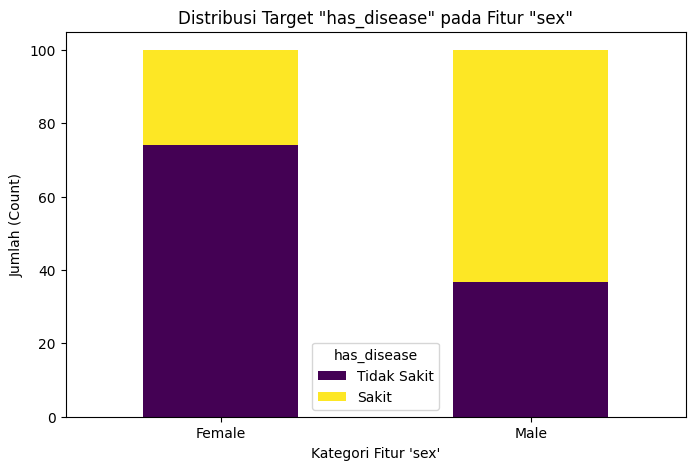

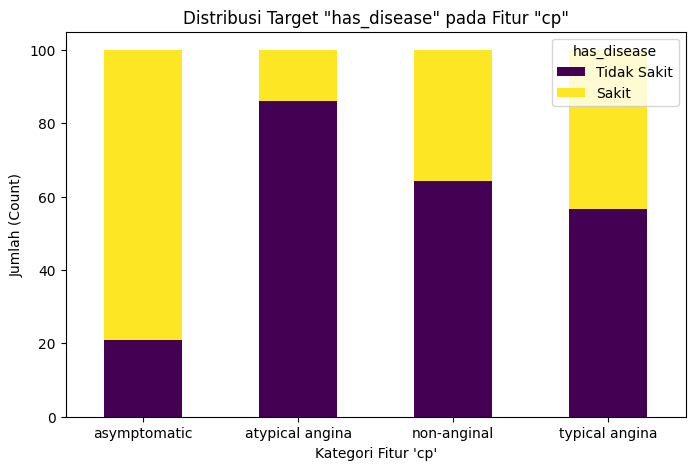

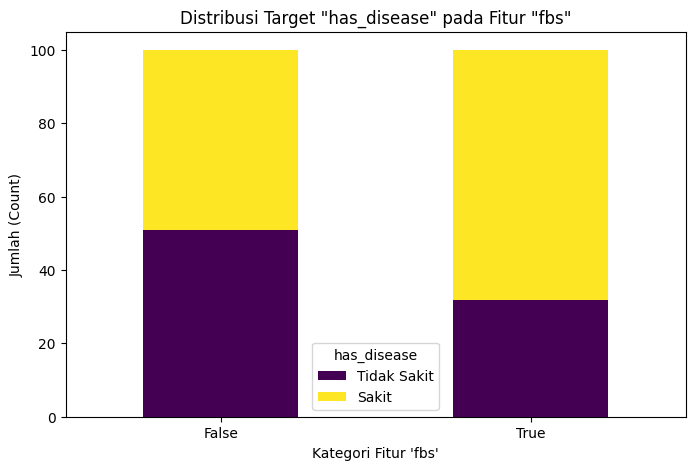

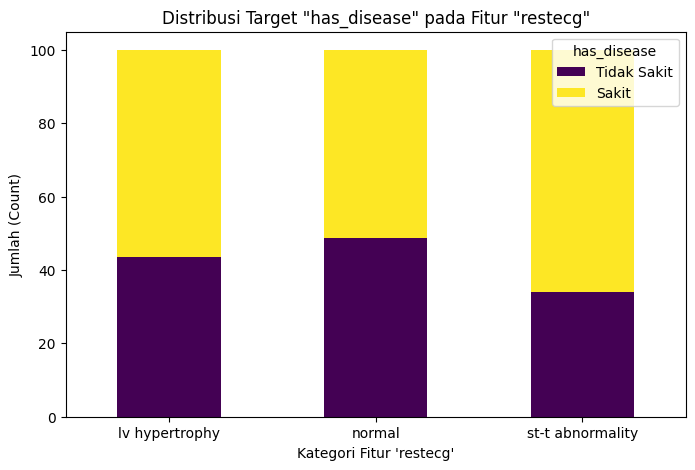

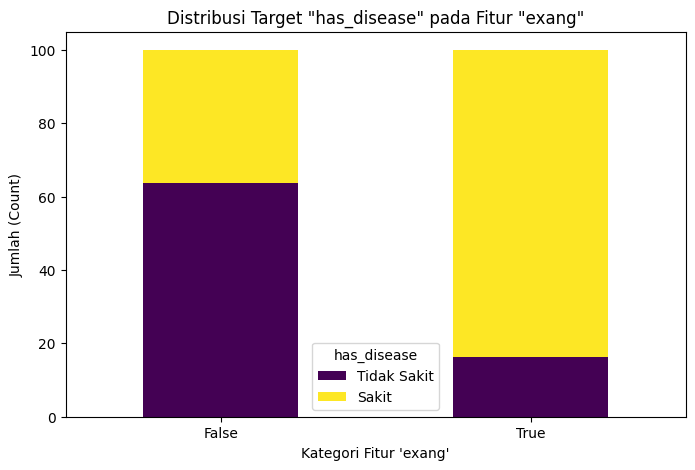

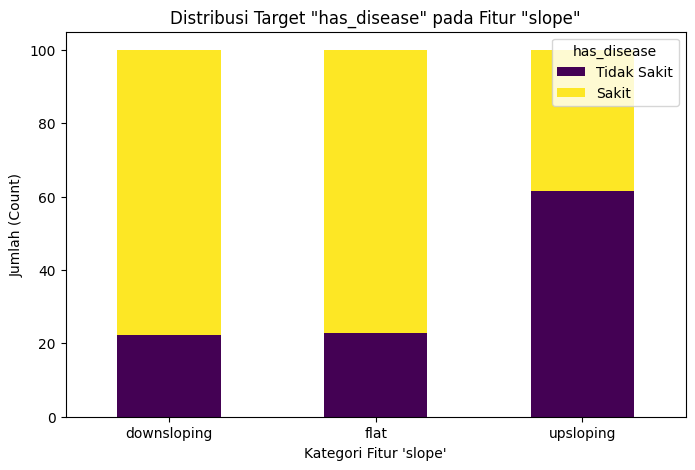

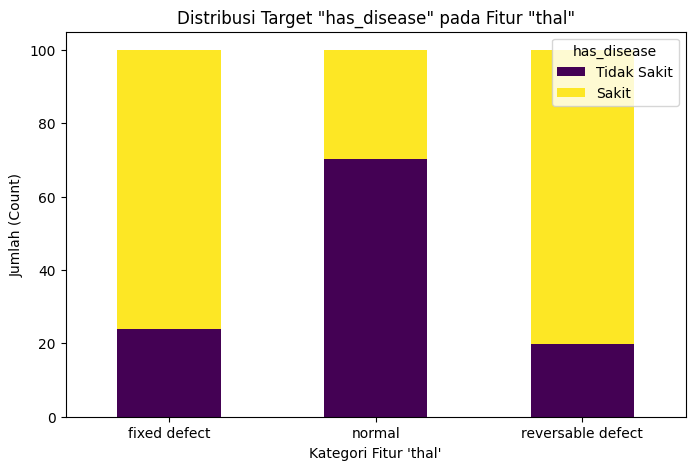

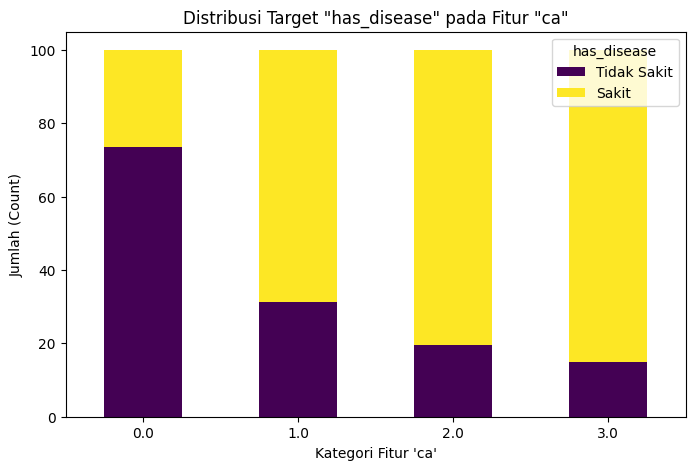

In [19]:
for categorical_feature in categorical_features:
    cross_tab = pd.crosstab(df[categorical_feature], df[target_col])

    cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    cross_tab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))

    plt.title(f'Distribusi Target "{target_col}" pada Fitur "{categorical_feature}"')
    plt.ylabel("Jumlah (Count)")
    plt.xlabel(f"Kategori Fitur '{categorical_feature}'")
    plt.legend(title=target_col, labels=['Tidak Sakit', 'Sakit'])
    plt.xticks(rotation=0)
    
    plt.show()

### Hubungan Antar-Fitur

Dipilih dua pasangan dari beberapa fitur untuk mendeteksi hubungannya. Dalam memilih fitur-fitur yang berpotensi saling memengaruhi kuat, dilakukan studi literatur dari sumber-sumber berikut:
- age vs. thalch (detak jantung maksimal): Effect of Age and Other Factors on Maximal Heart Rate by Londeree and Moeschberger. Dalam research tersebut, disimpulkan bahwa terdapat korelasi kuat antara detak jantung maksimal dengan usia.
- trestbps (rest blood pressure) vs. chol (cholestrol measurement): Cardiovascular disease (CVDs) from WHO. Dalam artikel tersebut dikatakan bahwa behavioural risk factors utama untuk penyakit jantung adalah diet tidak sehat, ketidakaktifan secara fisik, penggunaan tembakau, dan penggunaan alkohol yang berbahaya. Efek dari faktor-faktor ini dapat muncul sebagai kenaikan salah satunya kenaikan tekanan darah dan kenaikan lemak darah (raised blood lipids) yang berkaitan dengan tingkat kolestrol
- sex vs. trestbps: Blood Pressure and Its Association with Gender, Body Mass Index, Smoking, and Family History among University Students by Alhawari dkk., dari hasil research disimpulkan bahwa gender juga harus diperhatikan dalam analisis frekuensi tekanan darah. Hal ini terjadi karena dalam research tersebut didapatkan bahwa laki-laki memiliki nilai mean tekanan darah yang lebih tinggi daripada perempuan. 


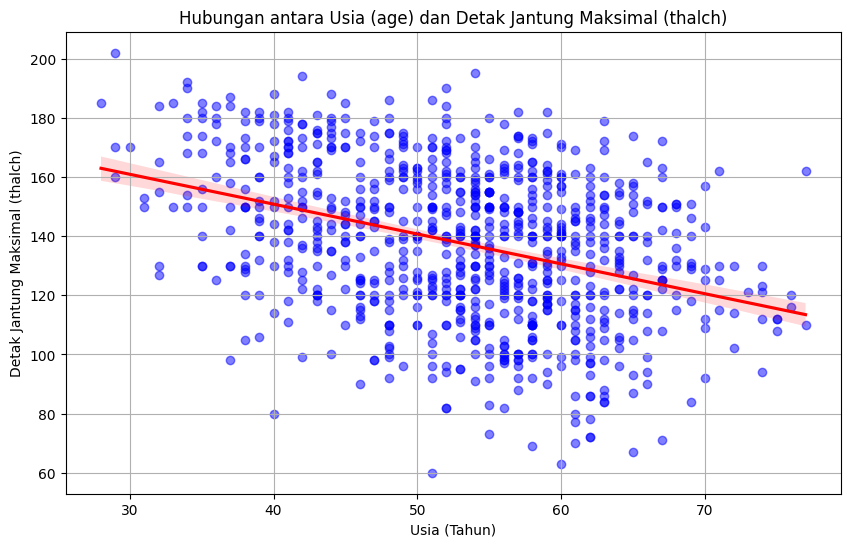

In [20]:
plt.figure(figsize=(10, 6))

sns.regplot(x='age', y='thalch', data=df,
            scatter_kws={'alpha':0.5, 'color':'blue'},
            line_kws={'color':'red'})

plt.title('Hubungan antara Usia (age) dan Detak Jantung Maksimal (thalch)')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Detak Jantung Maksimal (thalch)')
plt.grid(True)
plt.show()

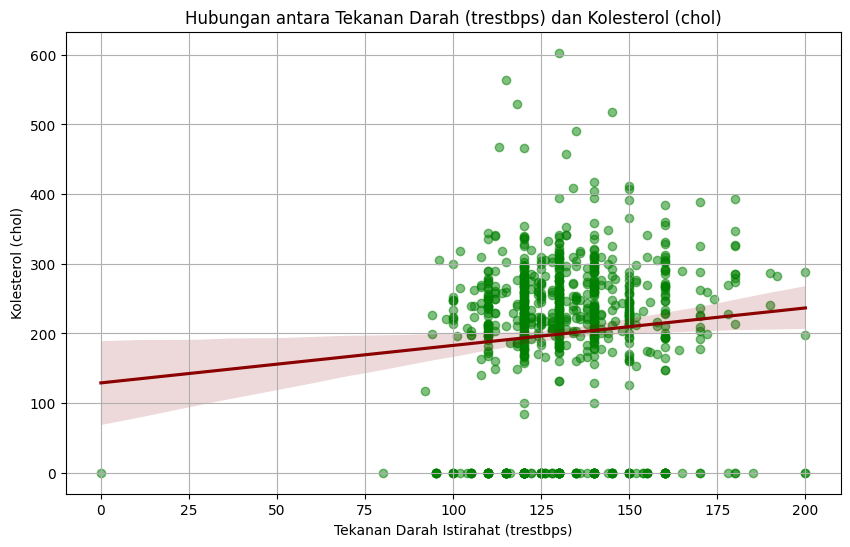

In [21]:
plt.figure(figsize=(10, 6))

sns.regplot(x='trestbps', y='chol', data=df,
            scatter_kws={'alpha':0.5, 'color':'green'},
            line_kws={'color':'darkred'})

plt.title('Hubungan antara Tekanan Darah (trestbps) dan Kolesterol (chol)')
plt.xlabel('Tekanan Darah Istirahat (trestbps)')
plt.ylabel('Kolesterol (chol)')
plt.grid(True)
plt.show()

/tmp/ipykernel_62593/16208421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='trestbps', data=df, palette='viridis')


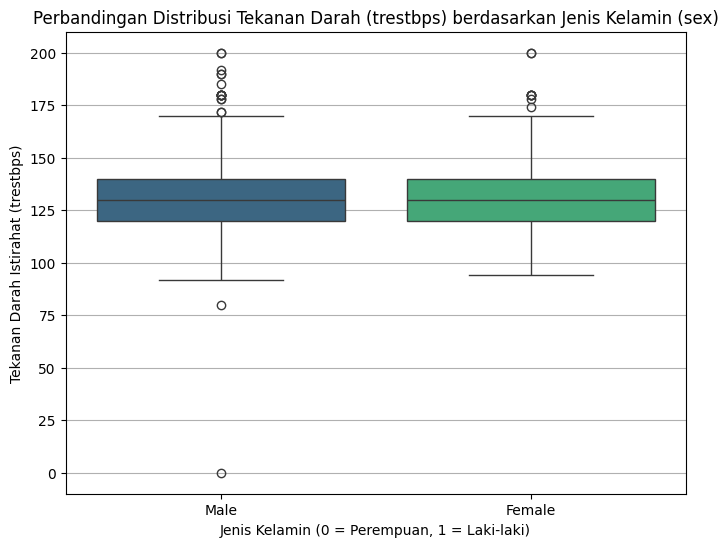

In [22]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='sex', y='trestbps', data=df, palette='viridis')

plt.title('Perbandingan Distribusi Tekanan Darah (trestbps) berdasarkan Jenis Kelamin (sex)')
plt.xlabel('Jenis Kelamin (0 = Perempuan, 1 = Laki-laki)')
plt.ylabel('Tekanan Darah Istirahat (trestbps)')
plt.grid(axis='y')
plt.show()

## Multivariate Analysis 

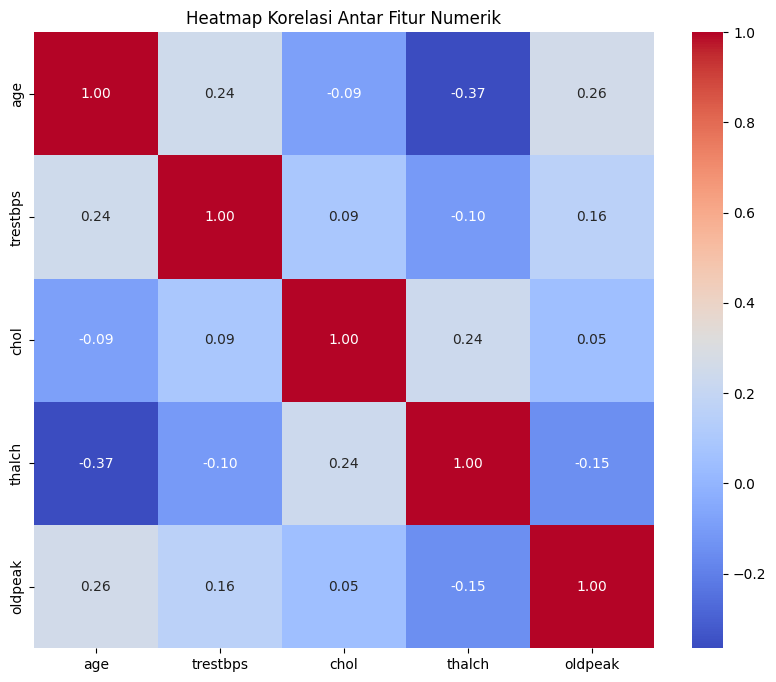

In [23]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

/tmp/ipykernel_62593/2317518338.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Status Penyakit (has_disease)')


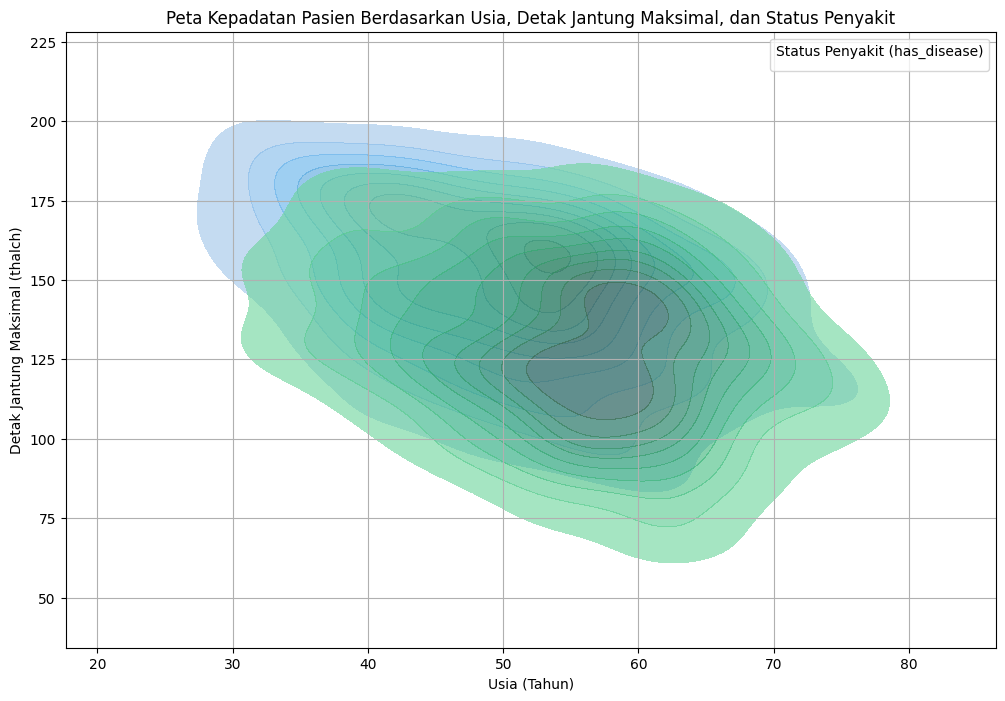

In [24]:
plt.figure(figsize=(12, 8))

sns.kdeplot(data=df, x='age', y='thalch', hue='has_disease',
            fill=True,         
            alpha=0.6,        
            palette='viridis')

plt.title('Peta Kepadatan Pasien Berdasarkan Usia, Detak Jantung Maksimal, dan Status Penyakit')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Detak Jantung Maksimal (thalch)')
plt.legend(title='Status Penyakit (has_disease)')
plt.grid(True)
plt.show()

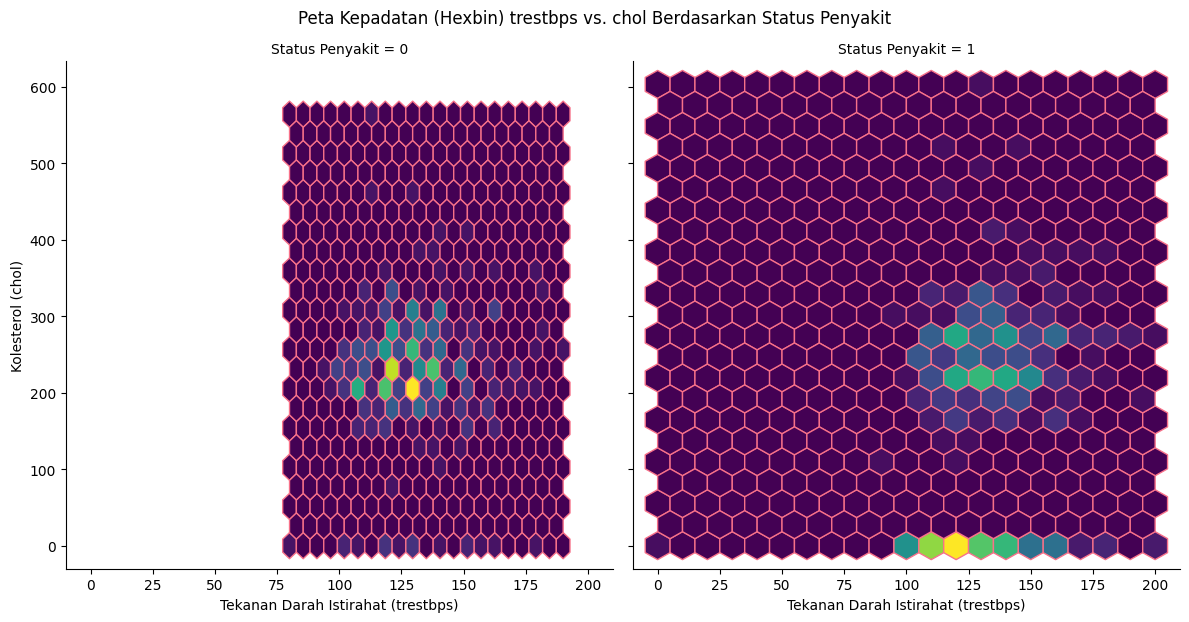

In [25]:
g = sns.FacetGrid(df, col="has_disease", height=6)

g.map(plt.hexbin, 'trestbps', 'chol', gridsize=20, cmap='viridis')

g.fig.suptitle('Peta Kepadatan (Hexbin) trestbps vs. chol Berdasarkan Status Penyakit', y=1.03)
g.set_axis_labels('Tekanan Darah Istirahat (trestbps)', 'Kolesterol (chol)')
g.set_titles("Status Penyakit = {col_name}")

plt.show()

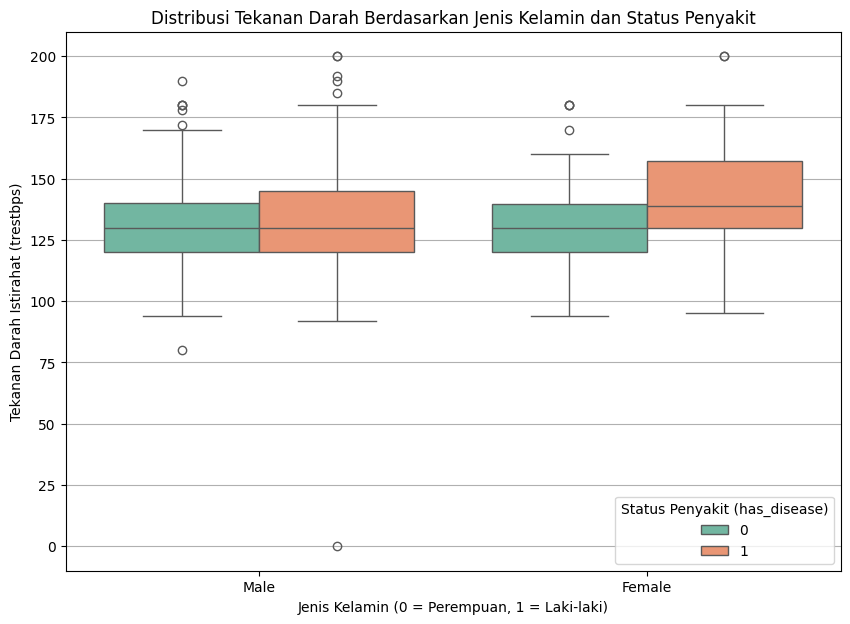

In [26]:
plt.figure(figsize=(10, 7))

sns.boxplot(x='sex', y='trestbps', hue='has_disease', data=df, palette='Set2')

plt.title('Distribusi Tekanan Darah Berdasarkan Jenis Kelamin dan Status Penyakit')
plt.xlabel('Jenis Kelamin (0 = Perempuan, 1 = Laki-laki)')
plt.ylabel('Tekanan Darah Istirahat (trestbps)')
plt.legend(title='Status Penyakit (has_disease)')
plt.grid(axis='y')
plt.show()

## Outliers Checks 

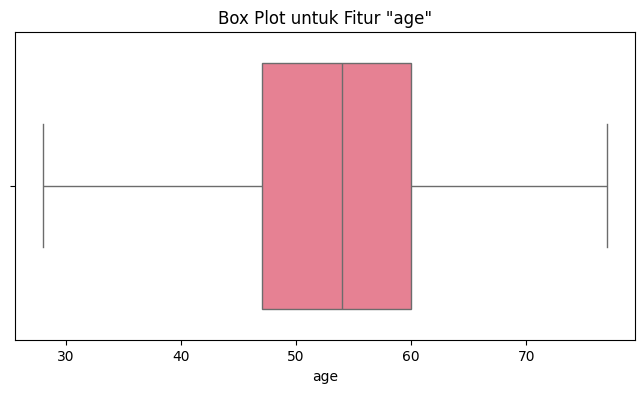

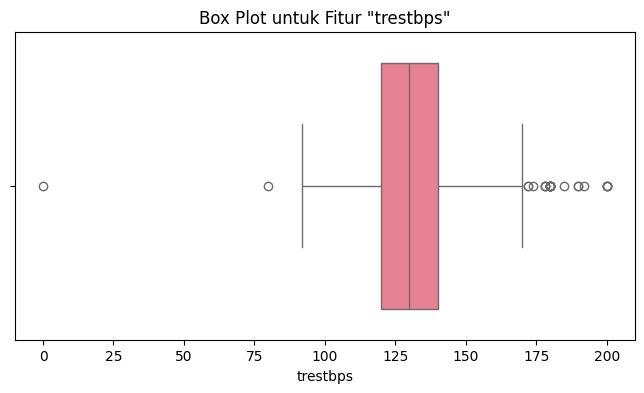

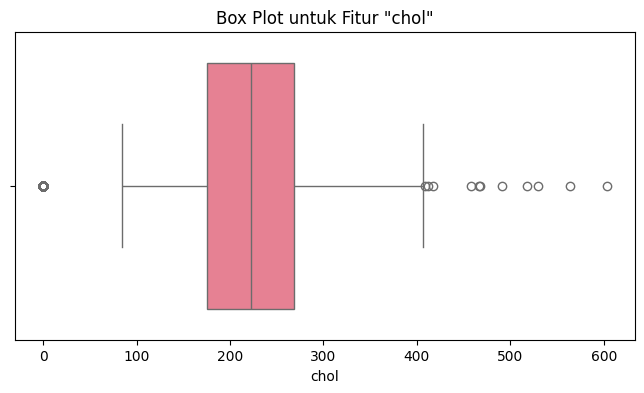

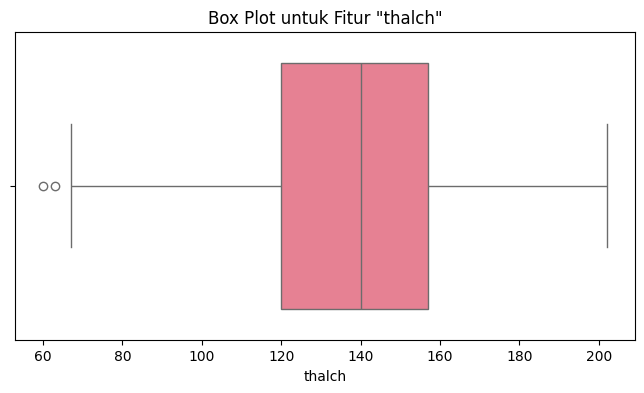

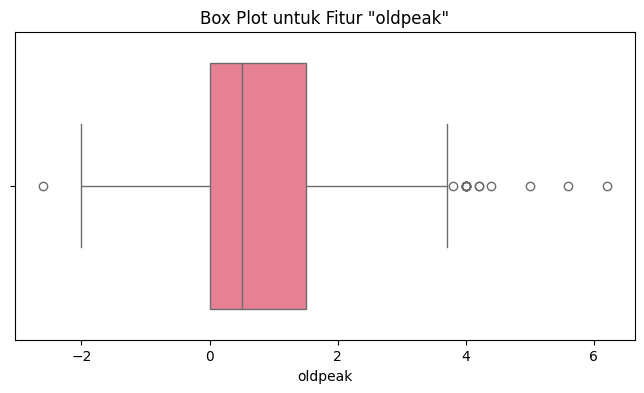

In [27]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    
    sns.boxplot(x=df[feature])
    
    plt.title(f'Box Plot untuk Fitur "{feature}"')
    
    plt.show()

#### Hasil dari Outliers Check:
- age: Tidak ada outliers untuk fitur age
- trestbps (rest blood pressure): Terdapat outliers yaitu kelompok dengan trestbps nol (akan ditinjau sebagai missing values) dan kelompok dengan trestbps < 90 mmHg (kemungkinan tekanan darah rendah), serta kelompok dengan trestbps > 175 mmHg (kemungkinan tekanan darah tinggi/Hypertensive crisis). Pengkategorian ini berdasarkan sumber dari: https://my.clevelandclinic.org/health/diagnostics/17649-blood-pressure
- chol (cholestrol): Terdapat outliers yaitu kelompok dengan tingkat kolestrol nol (akan ditinjau sebagai missing values) dan tingkat cholestrol >= 400 mg/dl. Meskipun kelompok kedua dari outliers ini jarang terjadi, akan tetapi kasus tersebut masih mungkin terjadi pada orang-orang dengan kolestrol tinggi.Selain itu, kolestrol tinggi juga menjadi tanda adanya penyakit seperti stroke atau penyakit jantung.
- thalch (maximum heart rate achieved): Terdapat outliers yaitu kelompok dengan maksimal detak jantung sekitar 60-70 bpm. Meskipun kasus ini jarang terjadi, akan tetapi penderita bradikardia mungkin memiliki gejala ini.
- oldpeak: Outliers di kiri kemungkinan mewakili elevasi segmen ST. Outliers di kanan mewakili depresi segmen ST yang sangat signifikan. Secara klinis, ini adalah indikator kuat adanya iskemia miokard (kurangnya aliran darah ke otot jantung) saat olahraga. Kelompok ini kemungkinan besar adalah pasien dengan kondisi penyakit jantung paling parah dalam kumpulan data ini.

##### Kesimpulan:
- Outliers pada fitur-fitur di atas memiliki informasi penting mengenai kasus ekstrem dan variabilitas data. Mereka kemungkinan besar adalah representasi nyata dari pasien dengan respons fisiologis ekstrem atau menandakan kondisi penyakit tertentu. Oleh karena itu, outliers pada data ini dipilih untuk tidak  dihilangkan dan menjadi pertimbangkan digunakannya transformasi data untuk model yang sensitif. 

# Data Preprocessing 
Data Preprocessing terdiri atas data splitting, data encoding, data imputation, dan data preprocessing sesuai kebutuhan masing-masing algoritma Akan tetapi, secara umum, untuk semua algoritma, preprocess yang dilakukan sama kecuali untuk bagian data scaling. Beberapa model dipilih untuk menggunakan RobustScaler dan beberapa lainnya menggunakan StandardScaler. Oleh karena itu data preprocessing dapat dibungkus ke dalam class DataPreprocessor pada file preprocessor.py. Selain itu, alasan pembuatan class ini juga bertujuan agar DataPreprocessor dapat dimasukkan ke dalam pipeline dari imblearn agar saat k-fold cross-validation, tiap set data diperlakukan dengan pipeline yang sama.

## Data Splitting

Pada tahap ini dilakukan data splitting dengan rasio 80% untuk training set dan 20% untuk test set. Hold-Out Validation akan menggunakan training set untuk melatih model dan test set untuk melakukan validasi.

Sementara itu K-Fold menggunakan training set untuk melatih model. Training set ini akan dibagi menjadi K bagian untuk melatih model dan melakukan hyperparameter tuning, yang pada akhirnya akan dites menggunakan test set pada hold-out validation dengan hyperparameter hasil tuning. Proses data splitting ini memastikan tidak adanya data leakage 

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (736, 13)
y_train shape: (736,)
X_test shape: (184, 13)
y_test shape: (184,)


## Data Encoding

Setelah splitting tahap selanjutnya adalah data encoding. Tahap ini tidak terdapat secara eksplisit di file .ipynb tetapi termasuk ke dalam file preprocessor.py bersama proses **Data Imputation** dan **Data Scaling**

Dilakukan data encoding tipe kategorikal menggunakan OneHotEncoder untuk data nominal dan OrdinalEncoder untuk data ordinal. 

## Data Imputation

Data Imputation digunakan untuk mengisi missing values. Imputasi ini dilakukan setelah data menjadi numerik semua. Data imputation ini dilakukan dengan IterativeImputer

## Data Scaling
Dilakukan data scaling agar tidak ada fitur yang mendominasi, dan beberapa model membutuhkan data scaling ini seperti logistic regression, pca, k_means, knn, svm, dan ann. Data scaling yang digunakan adalah RobustScaler dan StandardScaler. Pada model yang kurang sensitif terhadap skala tetap dilakukan data scaling karena tidak berpengaruh terhadap performanya

## SMOTE

Dilakukan juga data balancing dengan SMOTE agar model tidak menjadi bias terhadap kelas mayoritas dan mampu mengenali pola dari kelas minoritas yang jumlahnya sedikit

### Data sebelum Data Preprocessing
### (**DIEKSEKUSI HANYA UNTUK HOLD-OUT VALIDATION**)

In [29]:
X_train.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
880,62,Male,asymptomatic,NaN,170.0,False,st-t abnormality,120.0,True,3.0,NaN,NaN,NaN
457,54,Male,non-anginal,150.0,NaN,False,normal,122.0,False,0.0,NaN,NaN,NaN
797,51,Male,non-anginal,NaN,339.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN
25,50,Female,non-anginal,120.0,219.0,False,normal,158.0,False,1.6,flat,0.0,normal
84,52,Male,atypical angina,120.0,325.0,False,normal,172.0,False,0.2,upsloping,0.0,normal
10,57,Male,asymptomatic,140.0,192.0,False,normal,148.0,False,0.4,flat,0.0,fixed defect
346,40,Male,non-anginal,130.0,281.0,False,normal,167.0,False,0.0,NaN,NaN,NaN
548,54,Male,asymptomatic,200.0,198.0,False,normal,142.0,True,2.0,flat,NaN,NaN
636,52,Male,asymptomatic,95.0,0.0,NaN,normal,82.0,True,NaN,NaN,NaN,NaN
594,56,Male,asymptomatic,155.0,342.0,True,normal,150.0,True,3.0,flat,NaN,NaN


In [30]:
X_test.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
319,36,Male,atypical angina,120.0,166.0,False,normal,180.0,False,0.0,NaN,NaN,NaN
377,45,Male,atypical angina,140.0,224.0,True,normal,122.0,False,0.0,NaN,NaN,NaN
538,48,Male,asymptomatic,160.0,329.0,False,normal,92.0,True,1.5,flat,NaN,NaN
296,59,Male,asymptomatic,164.0,176.0,True,lv hypertrophy,90.0,False,1.0,flat,2.0,fixed defect
531,40,Female,asymptomatic,150.0,392.0,False,normal,130.0,False,2.0,flat,NaN,fixed defect
70,65,Female,non-anginal,155.0,269.0,False,normal,148.0,False,0.8,upsloping,0.0,normal
493,34,Male,typical angina,140.0,156.0,False,normal,180.0,False,0.0,NaN,NaN,NaN
664,57,Male,asymptomatic,160.0,0.0,NaN,normal,98.0,True,2.0,flat,NaN,reversable defect
796,49,Male,typical angina,130.0,0.0,False,st-t abnormality,145.0,False,3.0,flat,NaN,NaN
30,69,Female,typical angina,140.0,239.0,False,normal,151.0,False,1.8,upsloping,2.0,normal


### Informasi Missing Values
Untuk kemudahan analisis, ditampilkan kembali informasi mengenai missing values

In [31]:
X_train.isnull().sum()

age           0
sex           0
cp            0
trestbps     45
chol         25
fbs          80
restecg       1
thalch       42
exang        42
oldpeak      45
slope       238
ca          486
thal        390
dtype: int64

In [32]:
X_test.isnull().sum()

age           0
sex           0
cp            0
trestbps     14
chol          5
fbs          10
restecg       1
thalch       13
exang        13
oldpeak      17
slope        71
ca          125
thal         96
dtype: int64

In [33]:
missing_values = X_train.isnull().sum()
missing_percentage = (missing_values / len(X_train)) * 100

missing_X_train = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("Missing values per kolom:")
print(missing_X_train[missing_X_train['Missing Count'] > 0])

if missing_X_train['Missing Count'].sum() == 0:
    print("Tidak ada missing values dalam dataset")
else: 
    print("Terdapat missing values")
    for col, missing_count in missing_values[missing_values > 0].items():
        percentage = (missing_count / len(X_train)) * 100
        print(f"  {col}: {missing_count} ({percentage:.1f}%)")

print(f"\nIMPLICIT MISSING VALUES (zeros di fitur medis):")
medical_features = ['trestbps', 'chol', 'thalch']

for col in medical_features:
    if col in X_train.columns:
        zero_count = (X_train[col] == 0).sum()
        if zero_count > 0:
            print(f"  {col}: {zero_count} zeros ({zero_count/len(X_train)*100:.1f}%) - likely missing")
        else:
            print(f"  {col}: No zeros")

Missing values per kolom:
          Missing Count  Missing Percentage
trestbps             45            6.114130
chol                 25            3.396739
fbs                  80           10.869565
restecg               1            0.135870
thalch               42            5.706522
exang                42            5.706522
oldpeak              45            6.114130
slope               238           32.336957
ca                  486           66.032609
thal                390           52.989130
Terdapat missing values
  trestbps: 45 (6.1%)
  chol: 25 (3.4%)
  fbs: 80 (10.9%)
  restecg: 1 (0.1%)
  thalch: 42 (5.7%)
  exang: 42 (5.7%)
  oldpeak: 45 (6.1%)
  slope: 238 (32.3%)
  ca: 486 (66.0%)
  thal: 390 (53.0%)

IMPLICIT MISSING VALUES (zeros di fitur medis):
  trestbps: 1 zeros (0.1%) - likely missing
  chol: 139 zeros (18.9%) - likely missing
  thalch: No zeros


In [34]:
missing_values = X_test.isnull().sum()
missing_percentage = (missing_values / len(X_test)) * 100

missing_X_test = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("Missing values per kolom:")
print(missing_X_test[missing_X_test['Missing Count'] > 0])

if missing_X_test['Missing Count'].sum() == 0:
    print("Tidak ada missing values dalam dataset")
else: 
    print("Terdapat missing values")
    for col, missing_count in missing_values[missing_values > 0].items():
        percentage = (missing_count / len(X_test)) * 100
        print(f"  {col}: {missing_count} ({percentage:.1f}%)")

print(f"\nIMPLICIT MISSING VALUES (zeros di fitur medis):")
medical_features = ['trestbps', 'chol', 'thalch']

for col in medical_features:
    if col in X_test.columns:
        zero_count = (X_test[col] == 0).sum()
        if zero_count > 0:
            print(f"  {col}: {zero_count} zeros ({zero_count/len(X_test)*100:.1f}%) - likely missing")
        else:
            print(f"  {col}: No zeros")

Missing values per kolom:
          Missing Count  Missing Percentage
trestbps             14            7.608696
chol                  5            2.717391
fbs                  10            5.434783
restecg               1            0.543478
thalch               13            7.065217
exang                13            7.065217
oldpeak              17            9.239130
slope                71           38.586957
ca                  125           67.934783
thal                 96           52.173913
Terdapat missing values
  trestbps: 14 (7.6%)
  chol: 5 (2.7%)
  fbs: 10 (5.4%)
  restecg: 1 (0.5%)
  thalch: 13 (7.1%)
  exang: 13 (7.1%)
  oldpeak: 17 (9.2%)
  slope: 71 (38.6%)
  ca: 125 (67.9%)
  thal: 96 (52.2%)

IMPLICIT MISSING VALUES (zeros di fitur medis):
  trestbps: No zeros
  chol: 33 zeros (17.9%) - likely missing
  thalch: No zeros


## Run Cell Preprocessing di Bawah sesuai Algoritma 

### Pre: K-Nearest Neighbors (KNN)

In [ ]:
from supervised_learning.knn import KNNClassifier
from imblearn.over_sampling import SMOTE
from supervised_learning.preprocessor import DataPreprocessor
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', message='.*This Pipeline instance is not fitted yet.*')

#### Pre: KNN - K-Fold Cross-Validation

In [ ]:

knn_preprocessor = DataPreprocessor(scaler=StandardScaler())
smote = SMOTE(random_state=42)
knn_classifier = KNNClassifier(K=21, distance='manhattan')
knn_scikit_classifier = KNeighborsClassifier(n_neighbors=21, p=1)

knn_pipe = Pipeline([
    ('preprocessor', knn_preprocessor),
    ('sampler', smote),
    ('classifier', knn_classifier)
])

knn_scikit_pipe = Pipeline([
    ('preprocessor', knn_preprocessor),
    ('sampler', smote),
    ('classifier', knn_scikit_classifier)
])

#### Pre: KNN - Hold-Out Validation

In [ ]:
knn_preprocessor = DataPreprocessor(scaler=StandardScaler())
smote = SMOTE(random_state=42)

X_train = knn_preprocessor.fit_transform(X_train, y_train)
X_test = knn_preprocessor.transform(X_test)

X_train, y_train = smote.fit_resample(X_train, y_train)

### Pre: Logistic Regression

In [ ]:
from supervised_learning.logistic_regression import LogisticRegressionClassifier
from imblearn.over_sampling import SMOTE
from supervised_learning.preprocessor import DataPreprocessor
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore', message='.*This Pipeline instance is not fitted yet.*')

#### Pre: Logistic Reg - K-Fold Cross-Validation

In [ ]:

logreg_preprocessor = DataPreprocessor()
smote = SMOTE(random_state=42)
logreg_classifier = LogisticRegressionClassifier(
    learning_rate=0.01, n_iters=1000, regularization_term='l2', optimizer='gradient_descent',
    lambda_reg=1.0
)
logreg_scikit_classifier = LogisticRegression(
    penalty='l2', max_iter=1000, solver='liblinear', C=1.0, fit_intercept=True, random_state=42, tol=1e-9
)

logreg_pipe = Pipeline([
    ('preprocessor', logreg_preprocessor),
    ('sampler', smote),
    ('classifier', logreg_classifier)
])

logreg_scikit_pipe = Pipeline([
    ('preprocessor', logreg_preprocessor),
    ('sampler', smote),
    ('classifier', logreg_scikit_classifier)
])



#### Pre: Logistic Reg - Hold-Out Validation

In [ ]:
logreg_preprocessor = DataPreprocessor(scaler=(StandardScaler()))
smote = SMOTE(random_state=42)

X_train = logreg_preprocessor.fit_transform(X_train, y_train)
X_test = logreg_preprocessor.transform(X_test)

X_train, y_train = smote.fit_resample(X_train, y_train)

### Pre: Gaussian Naive Bayes 

In [ ]:
from supervised_learning.gaussian_naive_bayes import GaussianNaiveBayes
from imblearn.over_sampling import SMOTE
from supervised_learning.preprocessor import DataPreprocessor
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', message='.*This Pipeline instance is not fitted yet.*')


#### Pre: Gaussian Naive Bayes - K-Fold Cross-Validation

In [ ]:

gnb_preprocessor = DataPreprocessor()
smote = SMOTE(random_state=42)
gnb = GaussianNaiveBayes()
gnb_scikit = GaussianNB()

gnb_pipe = Pipeline([
    ('preprocessor', gnb_preprocessor),
    ('sampler', smote),
    ('classifier', gnb)
])

gnb_scikit_pipe = Pipeline([
    ('preprocessor', gnb_preprocessor),
    ('sampler', smote),
    ('classifier', gnb_scikit)
])


#### Pre: Gaussian Naive Bayes - Hold-Out Validation

In [ ]:
gnb_preprocessor = DataPreprocessor(scaler=(StandardScaler()))
smote = SMOTE(random_state=42)

X_train = gnb_preprocessor.fit_transform(X_train, y_train)
X_test = gnb_preprocessor.transform(X_test)

X_train, y_train = smote.fit_resample(X_train, y_train)

### Pre: CART Classifier

In [ ]:
from supervised_learning.cart import CARTClassifier
from imblearn.over_sampling import SMOTE
from supervised_learning.preprocessor import DataPreprocessor
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', message='.*This Pipeline instance is not fitted yet.*')


#### Pre: CART Classifier - K-Fold Cross-Validation

In [ ]:

cart_preprocessor = DataPreprocessor()
smote = SMOTE(random_state=42)
cart_classifier = CARTClassifier(max_depth=100, min_samples_leaf=1)
cart_classifier_scikit = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1)

cart_classifier_pipe = Pipeline([
    ('preprocessor', cart_preprocessor),
    ('sampler', smote),
    ('classifier', cart_classifier)
])

cart_classifier_scikit_pipe = Pipeline([
    ('preprocessor', cart_preprocessor),
    ('sampler', smote),
    ('classifier', cart_classifier_scikit)
])

#### Pre: CART Classifier - Hold-Out Validation

In [ ]:
cart_preprocessor = DataPreprocessor(scaler=(StandardScaler()))
smote = SMOTE(random_state=42)

X_train = cart_preprocessor.fit_transform(X_train, y_train)
X_test = cart_preprocessor.transform(X_test)

X_train, y_train = smote.fit_resample(X_train, y_train)

### Pre: Support Vector Machines (SVM): Support Vector Classifier (SVC)

In [ ]:
from supervised_learning.svm import SVC
from imblearn.over_sampling import SMOTE
from supervised_learning.preprocessor import DataPreprocessor
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC as SVCSklearn
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', message='.*This Pipeline instance is not fitted yet.*')


#### Pre: SVC - K-Fold Cross-Validation

In [ ]:

svc_preprocessor = DataPreprocessor()
smote = SMOTE(random_state=42)
svc = SVC(C=1, gamma=0.5, kernel='rbf')
svc_scikit = SVCSklearn(C=1, gamma=0.5)

svc_pipe = Pipeline([
    ('preprocessor', svc_preprocessor),
    ('sampler', smote),
    ('classifier', svc)
])

svc_scikit_pipe = Pipeline([
    ('preprocessor', svc_preprocessor),
    ('sampler', smote),
    ('classifier', svc_scikit)
])


#### Pre: SVC - Hold-Out Validation

In [ ]:
svc_preprocessor = DataPreprocessor(scaler=(StandardScaler()))
smote = SMOTE(random_state=42)

X_train = svc_preprocessor.fit_transform(X_train, y_train)
X_test = svc_preprocessor.transform(X_test)

X_train, y_train = smote.fit_resample(X_train, y_train)

### Pre: Artificial Neural Network (ANN)


In [50]:
from supervised_learning.ann import ANN
from supervised_learning.preprocessor import DataPreprocessor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2025-09-05 21:33:22.723013: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-05 21:33:22.783243: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-05 21:33:24.216427: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


#### Pre: ANN - K-Fold Cross-Validation (Setup Helper Functions)

In [ ]:
ann_preprocessor = DataPreprocessor()
smote = SMOTE(random_state=42)

X_train = ann_preprocessor.fit_transform(X_train, y_train)
X_test = ann_preprocessor.transform(X_test)

X_train, y_train = smote.fit_resample(X_train, y_train)

def k_fold_cross_validation(X, y, k=10, epochs=200, batch_size=8):
    fold_size = len(X) // k
    metrics_per_fold = []

    for fold in range(k):
        print(f"\n=== Fold {fold+1}/{k} ===")

        val_idx = np.arange(fold * fold_size, (fold + 1) * fold_size)
        train_idx = np.setdiff1d(np.arange(len(X)), val_idx)

        X_train_fold = np.array(X[train_idx], dtype=float)
        y_train_fold = np.array(y[train_idx], dtype=float)
        X_val_fold = np.array(X[val_idx], dtype=float)
        y_val_fold = np.array(y[val_idx], dtype=float)

        n_features = X_train_fold.shape[1]
        ann = ANN(
            layer_sizes=[n_features, 32, 16, 8, 1],
            activations=['relu', 'relu', 'relu', 'sigmoid'],
            init_methods=['he', 'he', 'he', 'xavier'],
            loss='binary_cross_entropy',
            regularization=None,
            lambda_reg=0.0001,
            optimizer='adam',
            lr=0.0001,
            optimizer_params={'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
        )

        ann.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size)

        y_pred = ann.predict(X_val_fold)
        y_pred_binary = (y_pred > 0.5).astype(int).flatten()
        y_val_binary = y_val_fold.flatten()

        acc = accuracy_score(y_val_binary, y_pred_binary)
        prec = precision_score(y_val_binary, y_pred_binary, zero_division=0)
        rec = recall_score(y_val_binary, y_pred_binary, zero_division=0)
        f1 = f1_score(y_val_binary, y_pred_binary, zero_division=0)

        print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1: {f1:.2f}")

        metrics_per_fold.append((acc, prec, rec, f1))

    avg_metrics = np.mean(metrics_per_fold, axis=0)
    print("\n=== Rata-rata K-Fold ===")
    print(f"Accuracy: {avg_metrics[0]:.2f}")
    print(f"Precision: {avg_metrics[1]:.2f}")
    print(f"Recall: {avg_metrics[2]:.2f}")
    print(f"F1-Score: {avg_metrics[3]:.2f}")

    return metrics_per_fold, avg_metrics


def build_ann(input_dim):

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)),
        tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(8, activation='relu', kernel_initializer='he_normal'),
        tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8),
        loss='binary_crossentropy'
    )
    return model

def k_fold_cross_validation_tf(X, y, k=10, epochs=200, batch_size=8):
    fold_size = len(X) // k
    metrics_per_fold = []

    for fold in range(k):
        print(f"\n=== Fold {fold+1}/{k} ===")

        val_idx = np.arange(fold * fold_size, (fold + 1) * fold_size)
        train_idx = np.setdiff1d(np.arange(len(X)), val_idx)

        X_train_fold, y_train_fold = X[train_idx], y[train_idx]
        X_val_fold, y_val_fold = X[val_idx], y[val_idx]

        model = build_ann(X.shape[1])

        model.fit(X_train_fold, y_train_fold, 
                  epochs=epochs, batch_size=batch_size,
                  verbose=0)
        
        y_pred = model.predict(X_val_fold)
        y_pred_binary = (y_pred > 0.5).astype(int).flatten()
        y_val_binary = y_val_fold.flatten()

        acc = accuracy_score(y_val_binary, y_pred_binary)
        prec = precision_score(y_val_binary, y_pred_binary, zero_division=0)
        rec = recall_score(y_val_binary, y_pred_binary, zero_division=0)
        f1 = f1_score(y_val_binary, y_pred_binary, zero_division=0)

        print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1: {f1:.2f}")

        metrics_per_fold.append((acc, prec, rec, f1))

    avg_metrics = np.mean(metrics_per_fold, axis=0)
    print("\n=== Rata-rata K-Fold ===")
    print(f"Accuracy: {avg_metrics[0]:.2f}")
    print(f"Precision: {avg_metrics[1]:.2f}")
    print(f"Recall: {avg_metrics[2]:.2f}")
    print(f"F1-Score: {avg_metrics[3]:.2f}")

    return metrics_per_fold, avg_metrics

#### Pre: ANN - Hold-Out Validation

In [52]:
ann_preprocessor = DataPreprocessor()
smote = SMOTE(random_state=42)

X_train = ann_preprocessor.fit_transform(X_train, y_train)
X_test = ann_preprocessor.transform(X_test)

X_train, y_train = smote.fit_resample(X_train, y_train)

## **BONUS**: Ensemble Learning

### Pre: Bragging - Random Forest

In [ ]:
from supervised_learning.random_forest import RandomForest
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from supervised_learning.preprocessor import DataPreprocessor
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', message='.*This Pipeline instance is not fitted yet.*')


#### Pre: Random Forest - K-Fold Cross-Validation

In [ ]:

rf_preprocessor = DataPreprocessor()
smote = SMOTE(random_state=42)
rf = RandomForest(n_estimators=50, max_depth=25, min_samples_split=2)
rf_scikit = RandomForestClassifier(n_estimators=50, max_depth=25, min_samples_split=2)

svc_preprocessor = DataPreprocessor()
smote = SMOTE(random_state=42)
svc = SVC(C=1, gamma=0.5, kernel='rbf')
svc_scikit = SVCSklearn(C=1, gamma=0.5)

rf_pipe = Pipeline([
    ('preprocessor', rf_preprocessor),
    ('sampler', smote),
    ('classifier', rf)
])

rf_scikit_pipe = Pipeline([
    ('preprocessor', rf_preprocessor),
    ('sampler', smote),
    ('classifier', rf_scikit)
])

#### Pre: Random Forest - Hold-Out Validation

In [ ]:
rf_preprocessor = DataPreprocessor(scaler=StandardScaler())
smote = SMOTE(random_state=42)

X_train = rf_preprocessor.fit_transform(X_train, y_train)
X_test = rf_preprocessor.transform(X_test)

X_train, y_train = smote.fit_resample(X_train, y_train)

### Data setelah Data Preprocessing 
### (**DIEKSEKUSI HANYA UNTUK HOLD-OUT VALIDATION**)

In [56]:
X_train.head()

,age,trestbps,chol,thalch,oldpeak,slope,thal,ca,sex_Male,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,exang_True
0,0.902413,0.174299,-1.464348,-0.670750,1.956850,0,0,0,1,-1,2,0,-1,0,0,1
1,0.034776,0.993953,0.074423,-0.591914,-0.825908,0,0,0,1,1,0,0,2,0,0,-1
2,-0.290587,0.065311,1.796321,0.143034,-0.020752,0,0,0,1,1,0,0,2,0,0,0
3,-0.399042,-0.667145,-0.518947,0.827135,0.658229,0,-1,-1,-2,1,0,0,2,0,0,-1
4,-0.182133,-0.667145,1.526206,1.378987,-0.640391,1,-1,-1,1,1,0,2,-1,0,0,-1


In [57]:
X_test.head()

,age,trestbps,chol,thalch,oldpeak,slope,thal,ca,sex_Male,restecg_normal,restecg_st-t abnormality,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,exang_True
0,-1.917406,-0.667145,-1.541524,1.694331,-0.825908,0,0,0,1,1,0,2,-1,0,0,-1
1,-0.941315,0.440253,-0.422478,-0.591914,-0.825908,0,0,0,1,1,0,2,-1,0,2,-1
2,-0.615951,1.547652,1.603382,-1.774455,0.565471,0,0,0,1,1,0,0,-1,0,0,1
3,0.577049,1.769132,-1.348585,-1.853291,0.101678,0,3,2,1,-1,0,0,-1,0,2,-1
4,-1.483587,0.993953,2.818898,-0.276570,1.029264,0,3,2,-2,1,0,0,-1,0,0,-1


In [58]:
X_train.isnull().sum()

age                         0
trestbps                    0
chol                        0
thalch                      0
oldpeak                     0
slope                       0
thal                        0
ca                          0
sex_Male                    0
restecg_normal              0
restecg_st-t abnormality    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
fbs_True                    0
exang_True                  0
dtype: int64

In [59]:
X_test.isnull().sum()

age                         0
trestbps                    0
chol                        0
thalch                      0
oldpeak                     0
slope                       0
thal                        0
ca                          0
sex_Male                    0
restecg_normal              0
restecg_st-t abnormality    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
fbs_True                    0
exang_True                  0
dtype: int64

In [60]:
missing_values = X_train.isnull().sum()
missing_percentage = (missing_values / len(X_train)) * 100

missing_X_train = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("Missing values per kolom:")
print(missing_X_train[missing_X_train['Missing Count'] > 0])

if missing_X_train['Missing Count'].sum() == 0:
    print("Tidak ada missing values dalam dataset")
else: 
    print("Terdapat missing values")
    for col, missing_count in missing_values[missing_values > 0].items():
        percentage = (missing_count / len(X_train)) * 100
        print(f"  {col}: {missing_count} ({percentage:.1f}%)")

print(f"\nIMPLICIT MISSING VALUES (zeros di fitur medis):")
medical_features = ['trestbps', 'chol', 'thalch']

for col in medical_features:
    if col in X_train.columns:
        zero_count = (X_train[col] == 0).sum()
        if zero_count > 0:
            print(f"  {col}: {zero_count} zeros ({zero_count/len(X_train)*100:.1f}%) - likely missing")
        else:
            print(f"  {col}: No zeros")

Missing values per kolom:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
Tidak ada missing values dalam dataset

IMPLICIT MISSING VALUES (zeros di fitur medis):
  trestbps: No zeros
  chol: No zeros
  thalch: No zeros


In [61]:
missing_values = X_test.isnull().sum()
missing_percentage = (missing_values / len(X_test)) * 100

missing_X_test = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("Missing values per kolom:")
print(missing_X_test[missing_X_test['Missing Count'] > 0])

if missing_X_test['Missing Count'].sum() == 0:
    print("Tidak ada missing values dalam dataset")
else: 
    print("Terdapat missing values")
    for col, missing_count in missing_values[missing_values > 0].items():
        percentage = (missing_count / len(X_test)) * 100
        print(f"  {col}: {missing_count} ({percentage:.1f}%)")

print(f"\nIMPLICIT MISSING VALUES (zeros di fitur medis):")
medical_features = ['trestbps', 'chol', 'thalch']

for col in medical_features:
    if col in X_test.columns:
        zero_count = (X_test[col] == 0).sum()
        if zero_count > 0:
            print(f"  {col}: {zero_count} zeros ({zero_count/len(X_test)*100:.1f}%) - likely missing")
        else:
            print(f"  {col}: No zeros")

Missing values per kolom:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
Tidak ada missing values dalam dataset

IMPLICIT MISSING VALUES (zeros di fitur medis):
  trestbps: No zeros
  chol: No zeros
  thalch: No zeros


# Modeling and Validation 

## Setup Helper Functions untuk K-Fold Validation dan Classification Report untuk Hold-Out Validation 

Helper function ini digunakan untuk menghitung dan menampilkan rata-rata accuracy, precision, recall, dan F1-Score pada K-Fold

In [62]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

import numpy as np

def evaluate_model_classification(model, X, y, cv):

    print("--- Evaluating Model with K-Fold Cross Validation ---")
    
    scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
    scores = cross_validate(model, X, y, scoring=scoring_metrics, cv=cv)
    
    print(f"Rata-rata Akurasi: {np.mean(scores['test_accuracy'])*100:.2f}%")
    print(f"Rata-rata Presisi: {np.mean(scores['test_precision'])*100:.2f}%")
    print(f"Rata-rata Recall: {np.mean(scores['test_recall'])*100:.2f}%")
    print(f"Rata-rata F1-Score: {np.mean(scores['test_f1'])*100:.2f}%")


## Splitting Data Training menjadi K Fold (untuk K-Fold Cross-Validation)

In [63]:
from sklearn.model_selection import KFold
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

## K-Nearest Neighbors (KKN)

### K-Fold Cross-Validation KNN

#### Pencarian Nilai K Optimal untuk Recall

In [ ]:
recalls = []
precisions = []
metrics = [{'name' : 'Recall', 'scoring' : 'recall', 'list' : recalls}, {'name' : 'Precision', 'scoring' : 'precision', 'list' : precisions}]

k_values = range(1, 40, 2)

from unsupervised_learning.pca import PCA
pca = PCA(n_components=3)

for metric in metrics:
    for k in k_values:
        classifier = KNNClassifier(K=k, distance='manhattan')

        knn_pipe = Pipeline([
            ('preprocessor', knn_preprocessor),
            ('sampler', smote),
            ('dimred', pca),
            ('classifier', classifier)
        ])
        scores = cross_val_score(knn_pipe, X_train, y_train, cv=kf, scoring=metric['scoring'])
        metric['list'].append(scores.mean())

    plt.plot(k_values, metric['list'], marker='o')
    plt.title(f"Pencarian Nilai K Terbaik Berdasarkan {metric['name']}")
    plt.xlabel("Nilai K")
    plt.ylabel(f"Rata-rata {metric['name']}")
    plt.grid(True)
    plt.show()

#### Evaluasi Model untuk K tertentu dengan K-Fold Cross-Validation

In [ ]:
evaluate_model_classification(knn_pipe, X_train, y_train, kf)

### K-Fold Cross Validation KNN dari Scikit-Learn

In [ ]:
evaluate_model_classification(knn_scikit_pipe, X_train, y_train, kf)

### Hold-Out Validation 

In [ ]:
knn_classifier = KNNClassifier(K=5, distance='manhattan')
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

### Hold-Out Validation Algoritma KKN dari Scikit-Learn

In [ ]:
knn_scikit = KNeighborsClassifier(n_neighbors=5, p=1)
knn_scikit.fit(X_train, y_train)
y_pred = knn_scikit.predict(X_test)

print(classification_report(y_test, y_pred))

## Logistic Regression

### K-Fold Cross-Validation Logistic Regression

In [ ]:
evaluate_model_classification(logreg_pipe, X_train, y_train, kf)

### K-Fold Cross-Validation Logistic Regression dari Scikit-Learn

In [ ]:
evaluate_model_classification(logreg_scikit_pipe, X_train, y_train, kf)

### Hold-Out Validation Logistic Regression


In [ ]:
logreg_classifier = LogisticRegressionClassifier(
    learning_rate=0.01, n_iters=1000, regularization_term='l2', optimizer='gradient_descent',
    lambda_reg=1.0
)
logreg_classifier.fit(X_train, y_train)

y_pred = logreg_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

### Hold-Out Validation Logistic Regression

In [ ]:
logreg_scikit_classifier = LogisticRegression(
    penalty='l2', max_iter=1000, solver='liblinear', C=1.0, fit_intercept=True, random_state=42, tol=1e-9
)

logreg_scikit_classifier.fit(X_train, y_train)

y_pred = logreg_scikit_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

## Gaussian Naive Bayes

### K-Fold Cross-Validation Gaussian Naive Bayes

In [ ]:
evaluate_model_classification(gnb_pipe, X_train, y_train, kf)

### K-Fold Cross-Validation Gaussian Naive Bayes dari Scikit-Learn

In [ ]:
evaluate_model_classification(gnb_scikit_pipe, X_train, y_train, kf)

### Hold-Out Validation Gaussian Naive Bayes

In [ ]:
gnb = GaussianNaiveBayes()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))

### Hold-Out Validation Gaussian Naive Bayes dari Scikit-Learn

In [ ]:
gnb_scikit = GaussianNB()

gnb_scikit.fit(X_train, y_train)

y_pred = gnb_scikit.predict(X_test)

print(classification_report(y_test, y_pred))

## CART: Classification

### K-Fold Cross-Validation CART


In [ ]:
evaluate_model_classification(cart_classifier_pipe, X_train, y_train, kf)

### K-Fold Cross-Validation CART dari Scikit-Learn

In [ ]:
evaluate_model_classification(cart_classifier_scikit_pipe, X_train, y_train, kf)

### Hold-Out Validation CART


In [ ]:
cart_classifier = CARTClassifier(max_depth=100, min_samples_leaf=1)

cart_classifier.fit(X_train, y_train)
y_pred = cart_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

### Hold-Out Validation CART dari Scikit-Learn

In [ ]:
cart_classifier_scikit = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1)

cart_classifier_scikit.fit(X_train, y_train)
y_pred = cart_classifier_scikit.predict(X_test)

print(classification_report(y_test, y_pred))

## SVM: SVC

### K-Fold Cross-Validation SVC

In [ ]:
evaluate_model_classification(svc_pipe, X_train, y_train, kf)

### K-Fold Cross-Validation SVC dari Scikit Learn

In [ ]:
evaluate_model_classification(svc_scikit_pipe, X_train, y_train, kf)

### Hold-Out Validation SVC

In [ ]:
svc = SVC(C=1, gamma=0.5, kernel='rbf')

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

### Hold-Out Validation SVC dari Scikit-Learn

In [ ]:
svc_scikit = SVCSklearn(C=1, gamma=0.5, kernel='rbf')

svc_scikit.fit(X_train, y_train)
y_pred = svc_scikit.predict(X_test)

print(classification_report(y_test, y_pred))

## ANN  (Artificial Neural Network)

### K-Fold Cross-Validation ANN


In [ ]:
metrics_per_fold, avg_metrics = k_fold_cross_validation(X_train.values, y_train.values, k=10, epochs=200, batch_size=8)


### K-Fold Cross Validation ANN dari TensorFlow

In [ ]:
metrics_per_fold, avg_metrics = k_fold_cross_validation_tf(X_train.values, y_train.values, k=10, epochs=200, batch_size=8)

### Hold-Out Validation ANN 

In [87]:
n_features = X_train.shape[1]
ann = ANN(
    layer_sizes=[n_features, 32, 16, 8, 1],
    activations=['relu', 'relu', 'relu', 'sigmoid'],
    init_methods=['he', 'he', 'he', 'xavier'],
    loss='binary_cross_entropy',
    regularization=None,
    lambda_reg=0.0001,
    optimizer='adam',
    lr=0.0001,
    optimizer_params={'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
)
losses = ann.fit(X_train, y_train, epochs=200, batch_size=8)

y_pred = ann.predict(X_test)
y_pred_binary = (y_pred> 0.5).astype(int).flatten()
y_test_binary = y_test.values.flatten() if isinstance(y_test, (pd.Series, pd.DataFrame)) else y_test.flatten()

print("ANN Metrics:")
print(f"y_pred_binary shape: {y_pred_binary.shape}")
print(f"y_test_binary shape: {y_test_binary.shape}")
print(f"Accuracy: {accuracy_score(y_test_binary, y_pred_binary):.2f}")
print(f"Precision: {precision_score(y_test_binary, y_pred_binary):.2f}")
print(f"Recall: {recall_score(y_test_binary, y_pred_binary):.2f}")
print(f"F1-Score: {f1_score(y_test_binary, y_pred_binary):.2f}")
print("Predictions:", y_pred_binary[:10])
print("True labels:", y_test_binary[:10])

X shape in fit: (800, 16)
y shape in fit: (800, 1)
Epoch 1/200, Loss: 0.8279
Epoch 2/200, Loss: 0.7380
Epoch 3/200, Loss: 0.6480
Epoch 4/200, Loss: 0.5739
Epoch 5/200, Loss: 0.5083
Epoch 6/200, Loss: 0.4543
Epoch 7/200, Loss: 0.3955
Epoch 8/200, Loss: 0.3415
Epoch 9/200, Loss: 0.2975
Epoch 10/200, Loss: 0.2647
Epoch 11/200, Loss: 0.2425
Epoch 12/200, Loss: 0.2266
Epoch 13/200, Loss: 0.2152
Epoch 14/200, Loss: 0.2053
Epoch 15/200, Loss: 0.1965
Epoch 16/200, Loss: 0.1896
Epoch 17/200, Loss: 0.1841
Epoch 18/200, Loss: 0.1795
Epoch 19/200, Loss: 0.1751
Epoch 20/200, Loss: 0.1711
Epoch 21/200, Loss: 0.1678
Epoch 22/200, Loss: 0.1652
Epoch 23/200, Loss: 0.1627
Epoch 24/200, Loss: 0.1603
Epoch 25/200, Loss: 0.1583
Epoch 26/200, Loss: 0.1565
Epoch 27/200, Loss: 0.1548
Epoch 28/200, Loss: 0.1533
Epoch 29/200, Loss: 0.1517
Epoch 30/200, Loss: 0.1500
Epoch 31/200, Loss: 0.1482
Epoch 32/200, Loss: 0.1463
Epoch 33/200, Loss: 0.1447
Epoch 34/200, Loss: 0.1431
Epoch 35/200, Loss: 0.1415
Epoch 36/200,

### Hold-Out Validation ANN dari TensorFlow

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4988 - loss: 1.0117 - val_accuracy: 0.3967 - val_loss: 1.1041
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4975 - loss: 0.9088 - val_accuracy: 0.3967 - val_loss: 1.0000
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4963 - loss: 0.8362 - val_accuracy: 0.3967 - val_loss: 0.9243
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4975 - loss: 0.7835 - val_accuracy: 0.3859 - val_loss: 0.8685
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4963 - loss: 0.7448 - val_accuracy: 0.3913 - val_loss: 0.8278
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4988 - loss: 0.7163 - val_accuracy: 0.3967 - val_loss: 0.7956
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5013 - loss: 0.6933 - val_accuracy: 0.4076 - val_loss: 0.7693
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5088 - loss: 0.6746 - val_accu

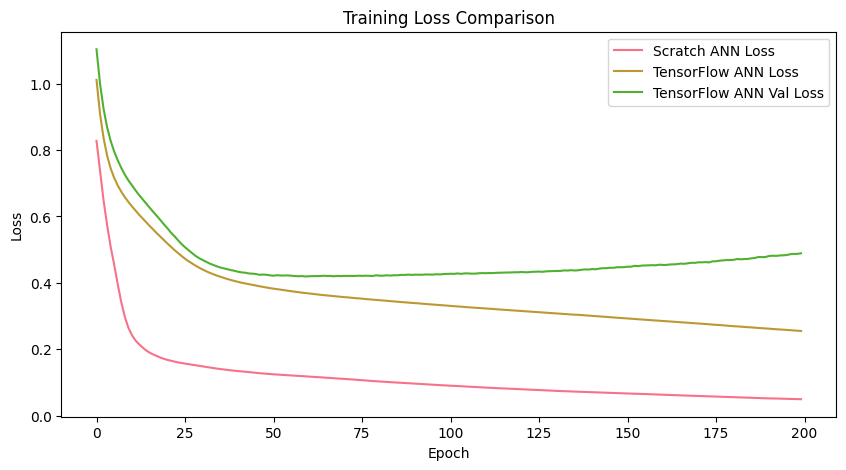

In [106]:
tf_model = Sequential([
    Dense(32, activation='relu', input_shape=(n_features,), kernel_initializer='he_normal'),
    Dense(16, activation='relu', kernel_initializer='he_normal'),
    Dense(8, activation='relu', kernel_initializer='he_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')
])

tf_model.compile(
    optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = tf_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=8,
    verbose=1,
    validation_data=(X_test, y_test)
)

y_pred_tf = tf_model.predict(X_test)
y_pred_tf_binary = (y_pred_tf > 0.5).astype(int).flatten()
y_test_binary = y_test.values.flatten() if isinstance(y_test, (pd.Series, pd.DataFrame)) else y_test.flatten()

print("\nTensorFlow ANN Metrics:")
print(f"y_pred_binary shape: {y_pred_tf_binary.shape}")
print(f"y_test_binary shape: {y_test_binary.shape}")
print(f"Accuracy: {accuracy_score(y_test_binary, y_pred_tf_binary):.2f}")
print(f"Precision: {precision_score(y_test_binary, y_pred_tf_binary):.2f}")
print(f"Recall: {recall_score(y_test_binary, y_pred_tf_binary):.2f}")
print(f"F1-Score: {f1_score(y_test_binary, y_pred_tf_binary):.2f}")
print("Predictions:", y_pred_tf_binary[:10])
print("True labels:", y_test_binary[:10])

plt.figure(figsize=(10, 5))
plt.plot(losses, label='Scratch ANN Loss')
plt.plot(history.history['loss'], label='TensorFlow ANN Loss')
plt.plot(history.history['val_loss'], label='TensorFlow ANN Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()

## **BONUS**: Ensemble Methods

## Bagging 

### K-Fold Cross-Validation Random Forest

In [ ]:
evaluate_model_classification(rf_pipe, X_train, y_train, kf)

### K-Fold Cross-Validation Random Forest dari Scikit-Learn

In [ ]:
evaluate_model_classification(rf_scikit_pipe, X_train, y_train, kf)

### Hold-Out Validation Random Forest


In [ ]:
rf = RandomForest(n_estimators=50, max_depth=25, min_samples_split=2)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

### Hold-Out Validation Random Forest dari Scikit-Learn

In [ ]:
rf_scikit = RandomForestClassifier(n_estimators=50, max_depth=25, min_samples_split=2)

rf_scikit.fit(X_train, y_train)
y_pred = rf_scikit.predict(X_test)

print(classification_report(y_test, y_pred))

## Evaluation Metrics

Evaluation Metrics yang digunakan adalah accuracy, precision, recall, dan F1-score.
1. Accuracy dipilih untuk memberikan gambaran umum seberapa banyak prediksi model yang benar
2. Precision dipilih untuk mengukur kemampuan model dalam menghindari false positives. Hal ini penting dalam deteksi penyakit jantung agar pasien sehat tidak salah dikategorikan sebagai sakit, yang dapat menyebabkan medical test tambahan yang mahal, kecemasan pasien, dan intervensi yang tidak perlu.
3. Recall (Sensitivity) dipilih karena false negatives pada deteksi penyakit jantung sangat berbahaya. Risiko kesehatan untuk false negatives sangat serius sehingga recall memastikan pasien yang benar-benar sakit terdeteksi dan tidak terlewat.
4. F1-Score dipilh untuk memberikan trade-off antara false positives dan false negatives. Metric ini cocok dalam kasus medis karena kedua kesalahan bisa berdampak serius

Dalam mengevaluasi model, metrics yang menjadi titik berat adalah precision dan recall.
- Precision: Ukuran prediksi positif benar-benar positif TP/(TP+FP)
- Recall: Ukuran aktual prediksi positif yang teridentifikasi dengan benar oleh model TP/(TP+FN)

Dapat dilihat bahwa kasus positif dan negatif saling bertolak belakang untuk precision dan recall, di sini diperlukan trade-off. Untuk ruang improvisasi, model harus memprioritaskan recall. Hal ini karena biaya dan konsekuensi untuk kesalahan false negative jauh lebih berbahaya dan menghabiskan biaya yang lebih tinggi

# Unsupervised Learning

In [ ]:
from supervised_learning.preprocessor import DataPreprocessor
preprocessor = DataPreprocessor() 
X_train = preprocessor.fit_transform(X_train,y_train)

## K-Means Clustering

In [ ]:
from unsupervised_learning.k_means import KMeans
from sklearn.cluster import KMeans as KMeansScikit

kmeans = KMeans(K=6, max_iter=200, init='random')
kmeans_scikit = KMeansScikit(n_clusters=6, init='random', max_iter=200)
kmeans.fit(X_train)
kmeans_scikit.fit(X_train)

labels = kmeans.labels_
labels_scikit = kmeans_scikit.labels_ 

X_train_clustered = X_train.copy()
X_train_clustered_scikit = X_train.copy()
X_train_clustered["Cluster"] = kmeans.predict(X_train)
X_train_clustered_scikit["Cluster"] = kmeans_scikit.predict(X_train)

In [ ]:
from sklearn.metrics import silhouette_score

score_scratch = silhouette_score(X_train, labels)
score_scikit = silhouette_score(X_train, labels_scikit)

print(f"Silhouette Score model scratch: {score_scratch:.3f}")
print(f"Silhouette Score model Scikit-learn: {score_scikit:.3f}")

In [ ]:
from sklearn.metrics import adjusted_rand_score

ari_scratch = adjusted_rand_score(y_train, labels)
ari_scikit = adjusted_rand_score(y_train, labels_scikit)

print(f"Adjusted Rand Index model scratch: {ari_scratch:.3f}")
print(f"Adjusted Rand Index model Scikit-learn: {ari_scikit:.3f}")

## Principal Component Analysis (PCA)

In [ ]:
from unsupervised_learning.pca import PCA
from sklearn.decomposition import PCA as PCAScikit

pca = PCA(n_components=15)
pca.fit(X_train)
pca_scikit = PCAScikit(n_components=15, svd_solver='covariance_eigh')
pca_scikit.fit(X_train)

In [ ]:
print(f"Explained variance model scratch: {pca.explained_variance_}")
print(f"Explained variance model Scikit-learn: {pca_scikit.explained_variance_}")

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [ ]:
from unsupervised_learning.dbscan import DBSCAN
from sklearn.cluster import DBSCAN as DBSCANScikit

dbscan = DBSCAN(epsilon=2, min_samples=5, metric='euclidean')
dbscan_scikit = DBSCANScikit(eps=2, min_samples=5, metric='euclidean')

dbscan.fit(X_train)
dbscan_scikit.fit(X_train)



In [ ]:
n_clusters_custom = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_clusters_scikit = len(set(dbscan_scikit.labels_)) - (1 if -1 in dbscan_scikit.labels_ else 0)

n_noise_custom = list(dbscan.labels_).count(-1)
n_noise_scikit = list(dbscan_scikit.labels_).count(-1)

print("--- Comparison ---")
print(f"Model scratch      : {n_clusters_custom} cluster, {n_noise_custom} noise points")
print(f"Model Scikit-learn: {n_clusters_scikit} cluster, {n_noise_scikit} noise points")